In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../sample_data/50000.csv')
df.head()

,Name,City,State,Zip,Bank,BankState,Term,NoEmp,NewExist,CreateJob,RetainedJob,UrbanRural,RevLineCr,LowDoc,MIS_Status,Sector,ApprovalMonth,IsFranchise,clean_GrAppv
0,"KC Countertops, Inc.",Ludlow,MA,1056,"TD BANK, NATIONAL ASSOCIATION",DE,36,2,1,0,2,1,1,0,1,31.0,Feb,0,15000.0
1,THE HOLBEK GROUP INC,ORANGE (CENSUS NAME FOR ORANGE,MA,1364,GREENFIELD CO-OPERATIVE BANK,MA,84,20,0,0,20,2,1,0,1,31.0,Jul,0,50000.0
2,PRINTED CIRCUIT CORP,WOBURN,MA,1801,MASSACHUSETTS BUSINESS,MA,120,210,0,0,0,0,0,0,1,31.0,Mar,0,800000.0
3,MAUI MOUNT & MACHINE,LOCKERVILLE,MA,1854,CITIZENS BANK NATL ASSOC,MA,84,1,0,1,2,1,1,0,1,31.0,Sep,0,10000.0
4,"MLS Sheet Metal, LLC",TEWKSBURY,MA,1876,ENTERPRISE BK & TR CO,MA,84,3,1,3,6,1,1,0,1,31.0,Nov,0,200000.0


In [4]:
pd.set_option('display.max_columns', None)
df

,Name,City,State,Zip,Bank,BankState,Term,NoEmp,NewExist,CreateJob,RetainedJob,UrbanRural,RevLineCr,LowDoc,MIS_Status,Sector,ApprovalMonth,IsFranchise,clean_GrAppv
0,"KC Countertops, Inc.",Ludlow,MA,1056,"TD BANK, NATIONAL ASSOCIATION",DE,36,2,1,0,2,1,1,0,1,31.0,Feb,0,15000.0
1,THE HOLBEK GROUP INC,ORANGE (CENSUS NAME FOR ORANGE,MA,1364,GREENFIELD CO-OPERATIVE BANK,MA,84,20,0,0,20,2,1,0,1,31.0,Jul,0,50000.0
2,PRINTED CIRCUIT CORP,WOBURN,MA,1801,MASSACHUSETTS BUSINESS,MA,120,210,0,0,0,0,0,0,1,31.0,Mar,0,800000.0
3,MAUI MOUNT & MACHINE,LOCKERVILLE,MA,1854,CITIZENS BANK NATL ASSOC,MA,84,1,0,1,2,1,1,0,1,31.0,Sep,0,10000.0
4,"MLS Sheet Metal, LLC",TEWKSBURY,MA,1876,ENTERPRISE BK & TR CO,MA,84,3,1,3,6,1,1,0,1,31.0,Nov,0,200000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,Never To Young To Be Inc.,GLEN BURNIE,MD,21061,BANK OF AMERICA NATL ASSOC,NC,84,7,0,0,7,1,0,0,1,44.0,Aug,0,50000.0
49996,FACE-N-REALITY,BALTIMORE,MD,21215,BANK OF AMERICA NATL ASSOC,OR,38,2,1,0,0,0,0,1,0,44.0,May,0,80000.0
49997,REVIVAL PROPERTIES,RICHMOND,VA,23233,BBCN BANK,CA,75,1,1,5,1,1,0,0,0,31.0,Jul,0,35000.0
49998,SNIPS OF VIRGINIA BEACH INC,VIRGINIA BEACH,VA,23455,BANK OF AMERICA NATL ASSOC,NC,35,7,0,1,8,1,1,0,1,44.0,Aug,0,50000.0


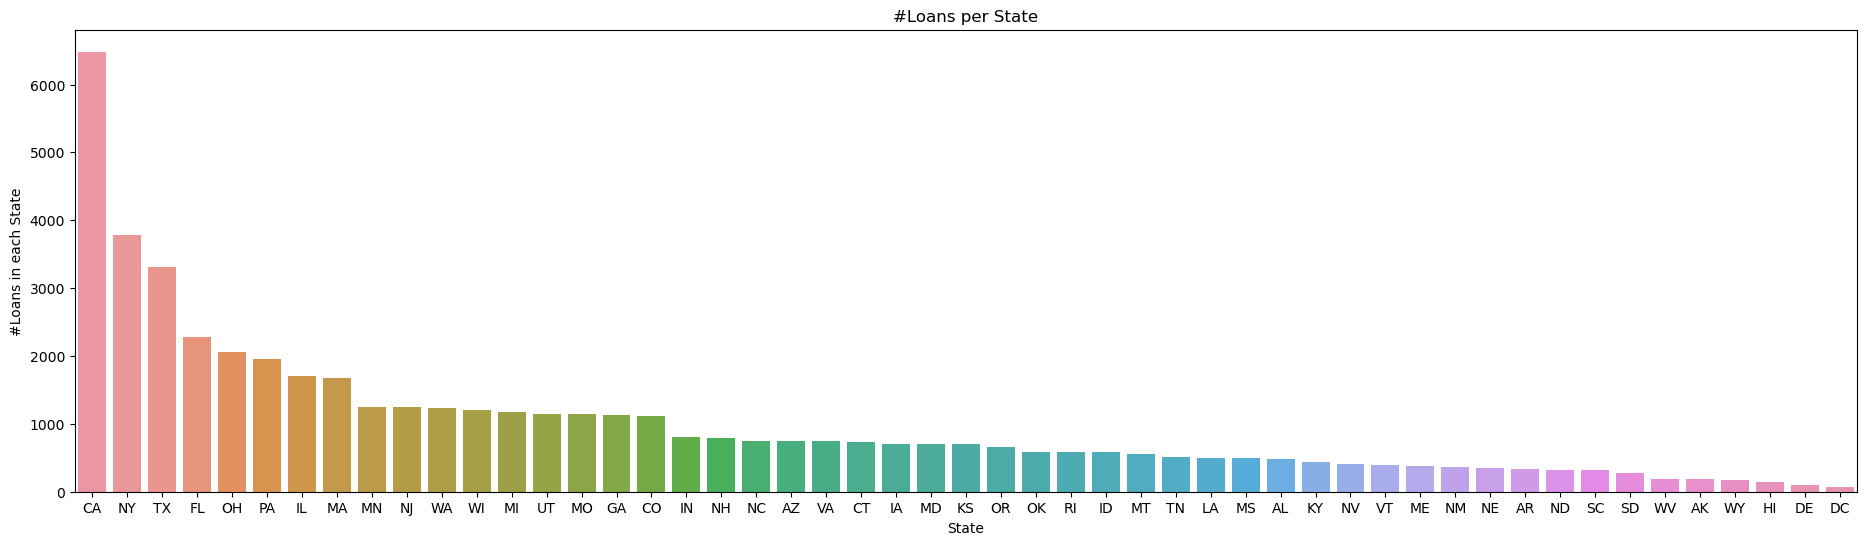

In [12]:
plt.figure(figsize=(23,6))
sns.barplot(x=df['State'].value_counts().index, y=df['State'].value_counts())
plt.title("#Loans per State")
plt.ylabel("#Loans in each State")
# save the plot
plt.savefig(f'../images/EDA/loans_per_state.png', dpi=300, bbox_inches='tight')
plt.show()


**Comment:** it's noticed that the vast majority of loans originate from California.

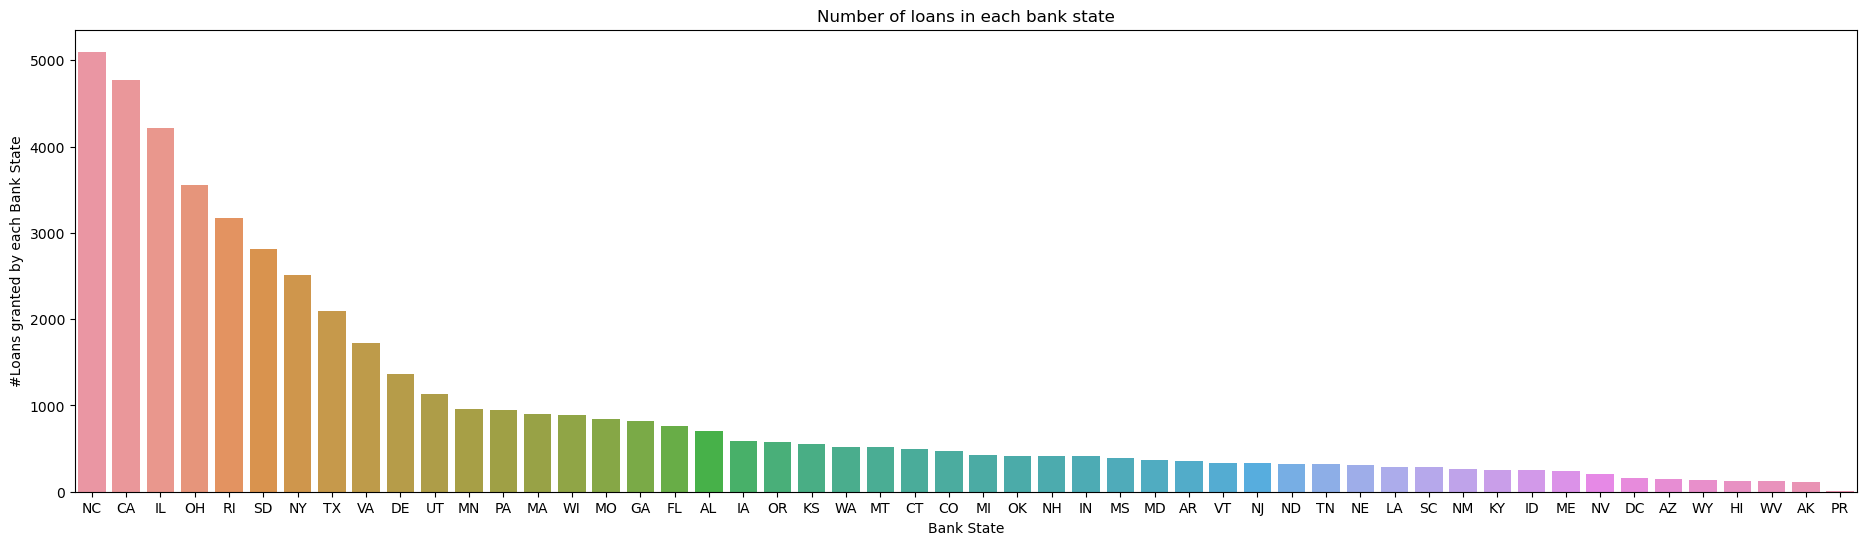

In [14]:
plt.figure(figsize=(23,6))
sns.barplot(x=df['BankState'].value_counts().index, y=df['BankState'].value_counts())
plt.title("Number of loans in each bank state")
plt.xlabel("Bank State")
plt.ylabel("#Loans granted by each Bank State")
plt.savefig(f'../images/EDA/loans_per_bank_state.png', dpi=300, bbox_inches='tight')
plt.show()

**Comments:** It seems there are many instances where loans are granted by banks to small businesses based in other states. For example, the majority of loans are granted by banks based in North Carolina, however North Carolina is not among the top 15 states from which loans originate. In another words, there are other banks give loans to states other than their own state.

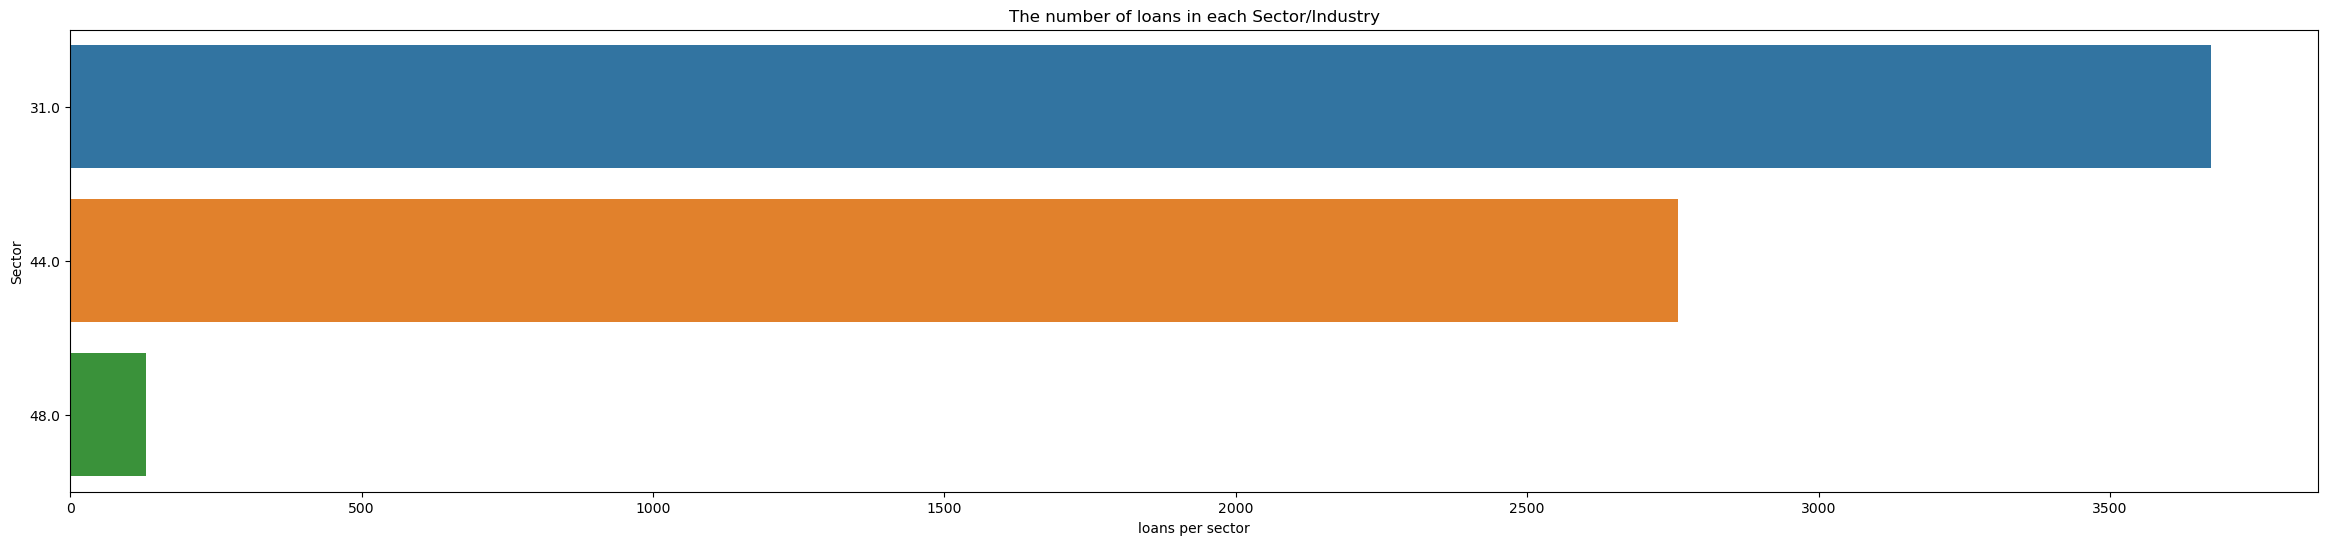

In [16]:
# TODO: fix this error there are missing sectors
plt.figure(figsize=(29,6))
sns.barplot(x=df['Sector'].value_counts(), y=df['Sector'].value_counts().index, orient='h')
plt.title("The number of loans in each Sector/Industry")
plt.xlabel("loans per sector")
plt.savefig(f'../images/EDA/loans_per_sector.png', dpi=300, bbox_inches='tight')
plt.show()

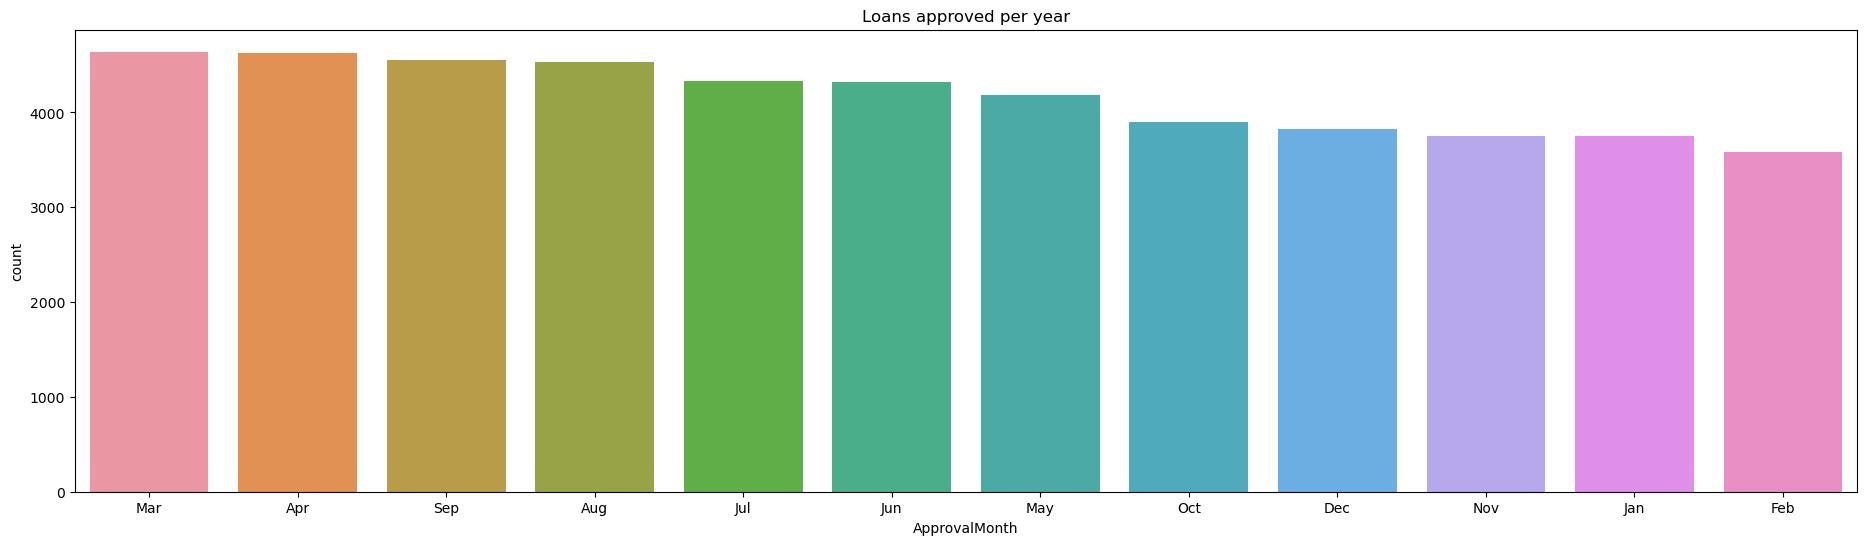

In [18]:

plt.figure(figsize=(23,6))
ax = sns.barplot(x=df['ApprovalMonth'].value_counts().index, y=df['ApprovalMonth'].value_counts())

# Highlight specific years
highlight_years = [2007, 2008, 2009]
for bar in ax.patches:
    if int(bar.get_x()) + 1976 in highlight_years:
        bar.set_color('red')

# Set plot title and labels
plt.title("Loans approved per year")

# Show the plot
plt.show()


This bar chart shows the loans approved per year. Highlighted in RED is the period of the Great Recession. We can see that there is a significant increase in the number of loans approved per year starting 2003, with the highest number of loans approved in 2007 when the Great Recession started, and a significant decrease in the loans approved in the following years.

In [15]:
# Convert the DateColumn to datetime objects
df['ChgOffDate'] = pd.to_datetime(df['ChgOffDate'], format='%d-%b-%y')

In [16]:
df['ChgOffFY'] = df[df['ChgOffDate'].notnull()]['ChgOffDate'].dt.year

In [17]:
df = df.fillna({'ChgOffFY':9999})

In [18]:
df['ChgOffFY'] = df['ChgOffFY'].astype(int)

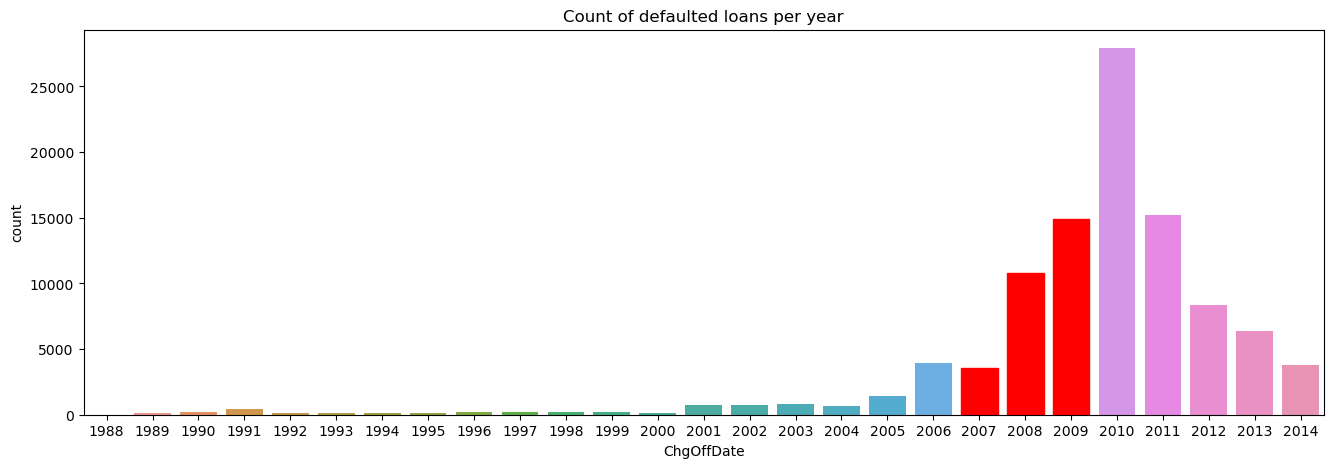

In [19]:
plt.figure(figsize=(16, 5))  # Set the figure size
ax = sns.barplot(x=df[df['ChgOffDate'].notnull()]['ChgOffDate'].dt.year.value_counts().index, y=df[df['ChgOffDate'].notnull()]['ChgOffDate'].dt.year.value_counts())
# Highlight specific years
highlight_years = [2007, 2008, 2009]
for bar in ax.patches:
    if int(bar.get_x()) + 1989 in highlight_years:
        bar.set_color('red')
plt.title("Count of defaulted loans per year")
plt.show()

A significant increase in defaulted loans is observed starting 2006, peaking in 2010. There are over 10x more defaulted loans in 2010 as compared to 2005 before the increase started. The increase in defaulted loans is expected, as if there is an increase in the number of loans granted there will also be an increase in the number of loans in default.

But are loans going into default at the same rate? Let's check this.

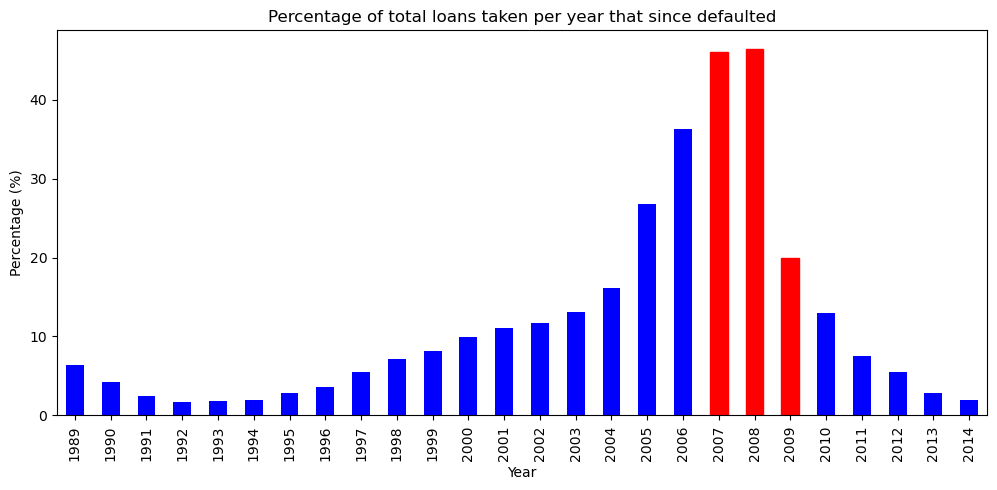

In [20]:
# Calculate the percentage of CHGOFF vs CHGOFF+PIF per year
pivot_table = df[df['ApprovalFY'] > 1988].pivot_table(index='ApprovalFY', columns='MIS_Status', aggfunc='size', fill_value=0)
pivot_table['Percentage'] = (pivot_table['CHGOFF'] / (pivot_table['CHGOFF'] + pivot_table['P I F'])) * 100

# Create a bar plot
plt.figure(figsize=(12, 5))  # Set the figure size
ax = pivot_table['Percentage'].plot(kind='bar', color='blue')
# Highlight specific years
highlight_years = [2007, 2008, 2009]
for bar in ax.patches:
    if int(bar.get_x()) + 1990 in highlight_years:
        bar.set_color('red')

# Set plot title and labels
plt.title('Percentage of total loans taken per year that since defaulted')
plt.xlabel('Year')
plt.ylabel('Percentage (%)')

# Show the plot
plt.show()


Here we observe the percentage of loans approved per year that  defaulted in subsequent years. The percentage of approved loans that eventually defaulted increased significantly starting 2005, 2 years before the Great Recession, and peaked the 1st two years of the Recession. This means the rate of loans going into default also increased.



So far we have:

- **2003**: increase in the number of approved loans per year
- **2005**: increase in the number of approved loans per year that eventually defaulted
- **2006**: increase in count of defaulted loans per year

In [21]:
df[(df['ApprovalFY'] == 2007) & (df['MIS_Status'] == 'CHGOFF')]

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,Industry,ChgOffFY
96106,2050685004,"MCCLANAHAN'S TIRE RECYCLING, I",GUASTI,CA,91743,CAPITAL ONE NATL ASSOC,VA,42,2-Oct-06,2007,58,20,1,0,20,0,1,N,N,2010-05-13,31-Oct-06,100000.0,0.0,CHGOFF,79226.0,100000.0,50000.0,Wholesale_trade,2010
96112,2050765004,Calicor Horse Corner Inc.,BELLEVILLE,MI,48111,JPMORGAN CHASE BANK NATL ASSOC,IL,11,2-Oct-06,2007,32,2,2,2,2,0,1,Y,N,2011-03-30,31-Oct-06,197001.0,0.0,CHGOFF,49000.0,50000.0,25000.0,Ag/For/Fish/Hunt,2011
96115,2050785010,Gee Gee Lawn Care,LAWRENCEVILLE,GA,30045,BANK OF AMERICA NATL ASSOC,NC,56,2-Oct-06,2007,60,3,1,0,3,0,1,Y,N,2009-01-08,31-Oct-06,74000.0,0.0,CHGOFF,49000.0,50000.0,25000.0,Admin_sup/Waste_Mgmt_Rem,2009
96118,2050805003,D & T Self Incorporated,MOORESVILLE,NC,28115,BANK OF AMERICA NATL ASSOC,NC,72,2-Oct-06,2007,64,20,1,0,20,0,1,Y,N,2008-12-12,31-Oct-06,73000.0,0.0,CHGOFF,49000.0,49000.0,24500.0,Accom/Food_serv,2008
96119,2050815006,Women's Health & Fitness LLC,RICHARDSON,TX,75080,JPMORGAN CHASE BANK NATL ASSOC,IL,62,2-Oct-06,2007,64,2,1,1,3,0,1,Y,N,2008-08-20,31-Oct-06,49906.0,0.0,CHGOFF,25000.0,25000.0,12500.0,Healthcare/Social_assist,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183764,3010116004,STEMMRICH LLC,ORANGE CITY,FL,32763,JPMORGAN CHASE BANK NATL ASSOC,IL,72,28-Sep-07,2007,51,4,1,0,4,0,2,Y,N,2010-09-21,30-Nov-07,46020.0,0.0,CHGOFF,28520.0,30000.0,15000.0,Accom/Food_serv,2010
183766,3010126007,COOLEY'S CUSTOM POOLS,OAKDALE,CA,95361,JPMORGAN CHASE BANK NATL ASSOC,IL,23,28-Sep-07,2007,48,4,1,0,4,0,2,Y,N,2010-11-16,31-Oct-07,41008.0,0.0,CHGOFF,22127.0,25000.0,12500.0,Construction,2010
183770,3010156005,LUXURY PERFUMES,SAN JOSE,CA,95122,JPMORGAN CHASE BANK NATL ASSOC,IL,44,28-Sep-07,2007,52,2,1,0,2,0,1,Y,N,2010-07-21,31-Oct-07,124446.0,0.0,CHGOFF,48166.0,50000.0,25000.0,Retail_trade,2010
183785,3010286009,FLORIDA ELECTRONIC TECH SALES,SAINT PETERSBURG,FL,33716,JPMORGAN CHASE BANK NATL ASSOC,IL,44,28-Sep-07,2007,51,1,1,0,1,0,1,Y,N,2010-08-19,31-Oct-07,67160.0,0.0,CHGOFF,21284.0,22500.0,11250.0,Retail_trade,2010


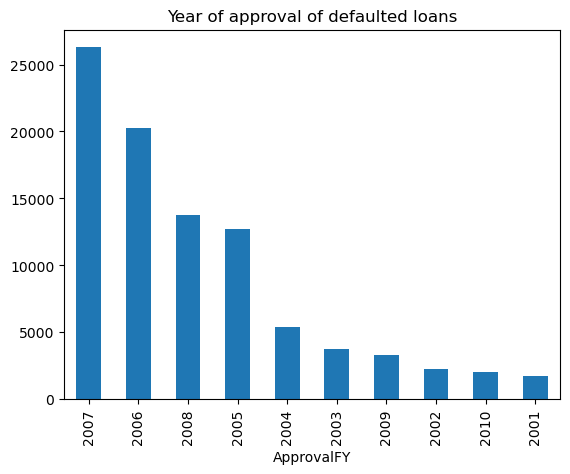

In [22]:
df.loc[df['MIS_Status'] == "CHGOFF", 'ApprovalFY'].value_counts().head(10).plot.bar()
plt.title("Year of approval of defaulted loans")
plt.show()

The highest number of loans went into default in 2010, most of which were approved in 2007 (the start of the Great Recession), followed by 2006 (year before the start of the Recession), 2008 (2nd year of the Recession) then 2005. We had previously noted that the percentage of approved loans that eventually defaulted increased significantly starting 2005, so it appears the effects of the Recession started in 2005 and lasted through to 2010.

In [23]:
df['ChgOffDate'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 465040 entries, 0 to 465039
Series name: ChgOffDate
Non-Null Count   Dtype         
--------------   -----         
101528 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 3.5 MB


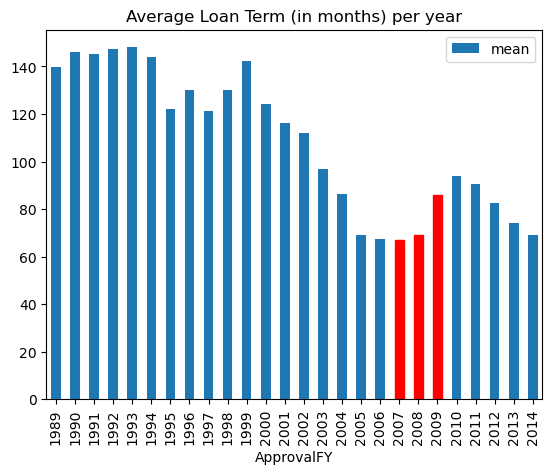

In [24]:
ax = df[df['ApprovalFY'] > 1988].groupby(["ApprovalFY"]).Term.agg(['mean']).plot.bar()
# Highlight specific years
highlight_years = [2007, 2008, 2009]
for bar in ax.patches:
    if int(bar.get_x()) + 1990 in highlight_years:
        bar.set_color('red')
plt.title("Average Loan Term (in months) per year")
plt.show()

The average loan term per year was at its lowest from 2005 to 2008. The period of Recession is highlighted in RED.

Let's take a closer look at the Term period of loans per year.

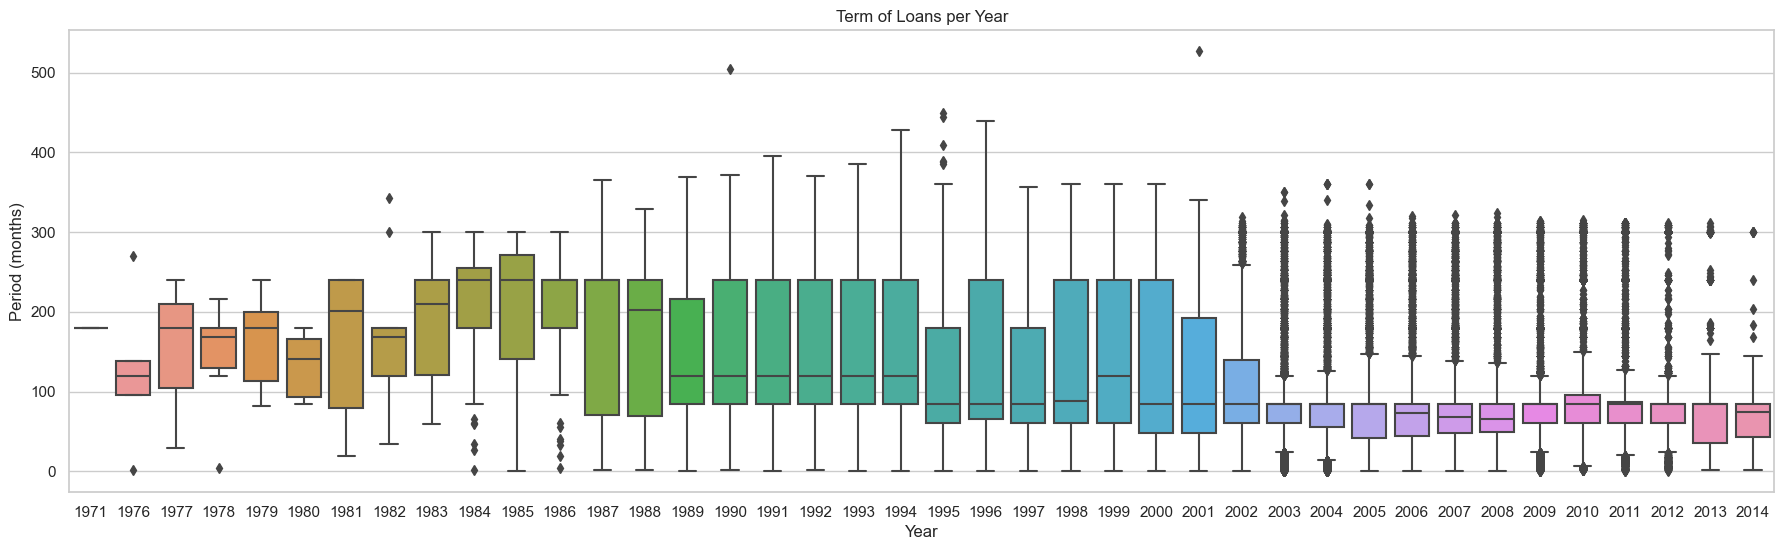

In [25]:
# Create a boxplot
plt.figure(figsize=(22, 6))
sns.set(style="whitegrid")
sns.boxplot(data=df, x='ApprovalFY', y='Term')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Period (months)')
plt.title('Term of Loans per Year')

# Show the plot
plt.show()


Here we see the most frequent loan term period narrowing from a range of approx. 70-250 months to a range under 100 months starting in 2003. This indicates there was a significant increase in the number of loans with terms under 100 months. The overall range of the loan term period is more or less the same from 1987 to 2012, however loans with term periods that were considered within the normal range before 2003 were considered outliers after 2003.

Let's do a further confirmation and look at the number of approved loans per year with term period less than 90 months.

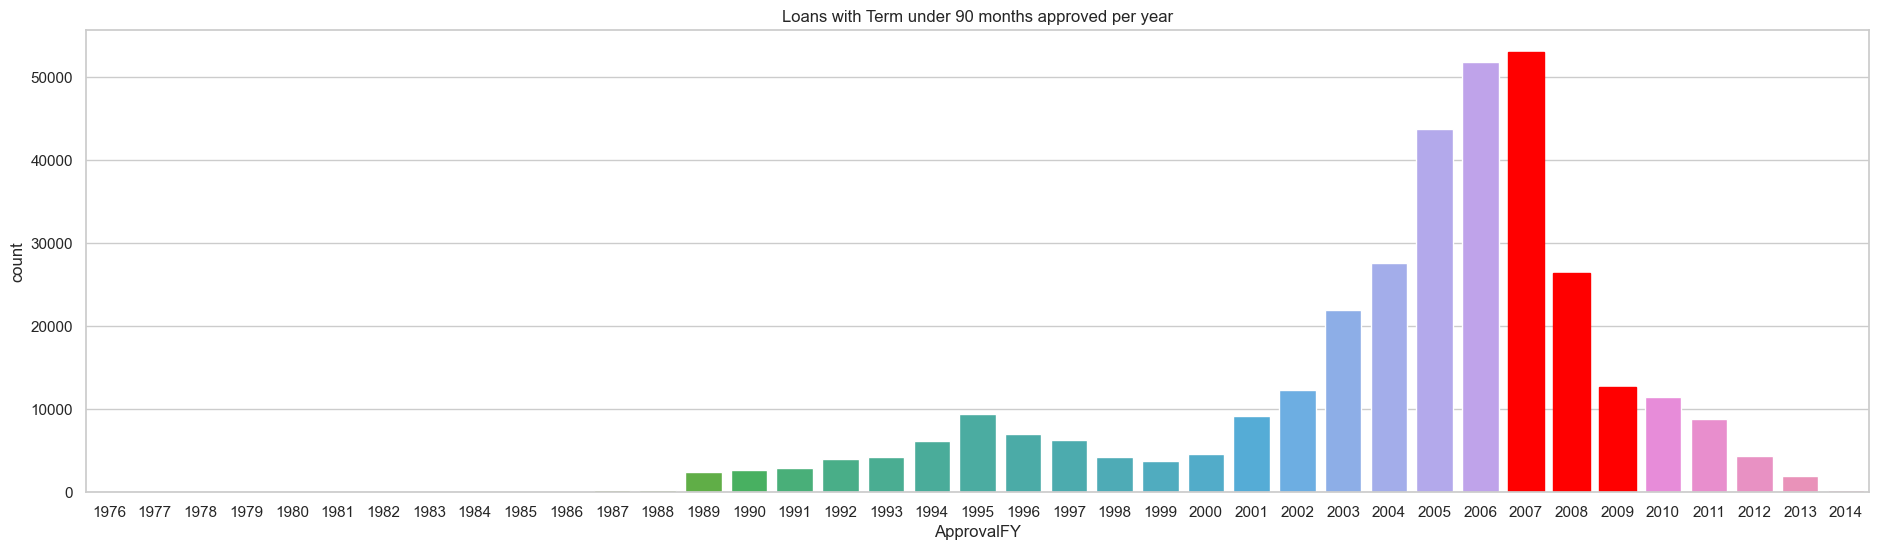

In [26]:
plt.figure(figsize=(23,6))
ax = sns.barplot(x=df.loc[df['Term'] < 90, 'ApprovalFY'].value_counts().index, y=df.loc[df['Term'] < 90, 'ApprovalFY'].value_counts())


# Highlight specific years
highlight_years = [2007, 2008, 2009]
for bar in ax.patches:
    if int(bar.get_x()) + 1977 in highlight_years:
        bar.set_color('red')

# Set plot title and labels
plt.title("Loans with Term under 90 months approved per year")

# Show the plot
plt.show()


We have confirmed an increase in the number of shorter term loans starting in 2003.

- **2003**: more loans were approved each year after 2003
- **2003**: more loans with shorter term periods were approved each year after 2003
- **2005**: increase in the number of approved loans per year that eventually defaulted
- **2005**: increase in the rate of loans going into default
- **2006**: increase in count of defaulted loans per year
- **2007**: Start of the Great Recession

It appears that a 5x increase in the number of loans with term periods less than 100 months resulted in an almost 7x increase in the number of loans going into default.

Let's look at the percentage of loans taken that went into default on a per State basis.

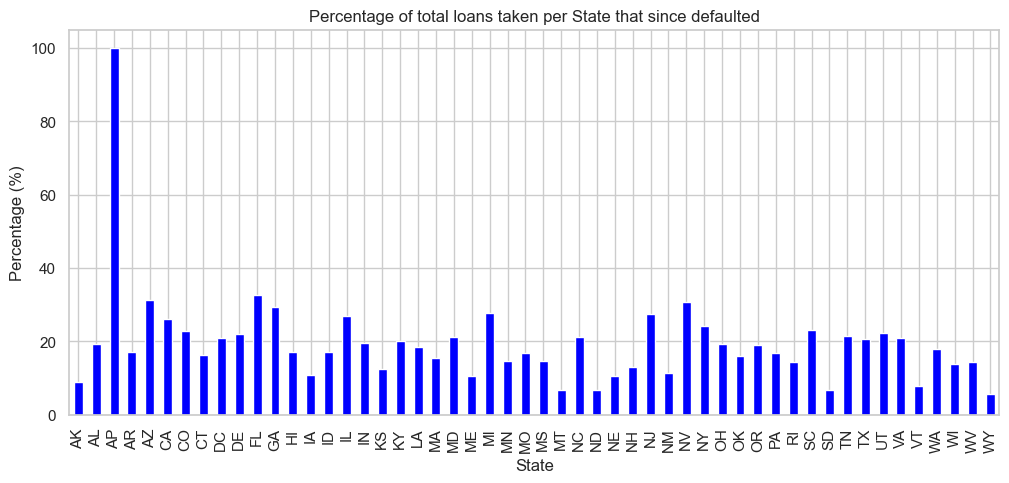

In [27]:
# Calculate the percentage of CHGOFF vs CHGOFF+PIF per year
pivot_table = df.pivot_table(index='State', columns='MIS_Status', aggfunc='size', fill_value=0)
pivot_table['Percentage'] = (pivot_table['CHGOFF'] / (pivot_table['CHGOFF'] + pivot_table['P I F'])) * 100

# Create a bar plot
plt.figure(figsize=(12, 5))  # Set the figure size
pivot_table['Percentage'].plot(kind='bar', color='blue')

# Set plot title and labels
plt.title('Percentage of total loans taken per State that since defaulted')
plt.xlabel('State')
plt.ylabel('Percentage (%)')

# Show the plot
plt.show()


There is only one entry in the dataset with the State "AP" (Armed Forces Pacific) so we can disregard that.

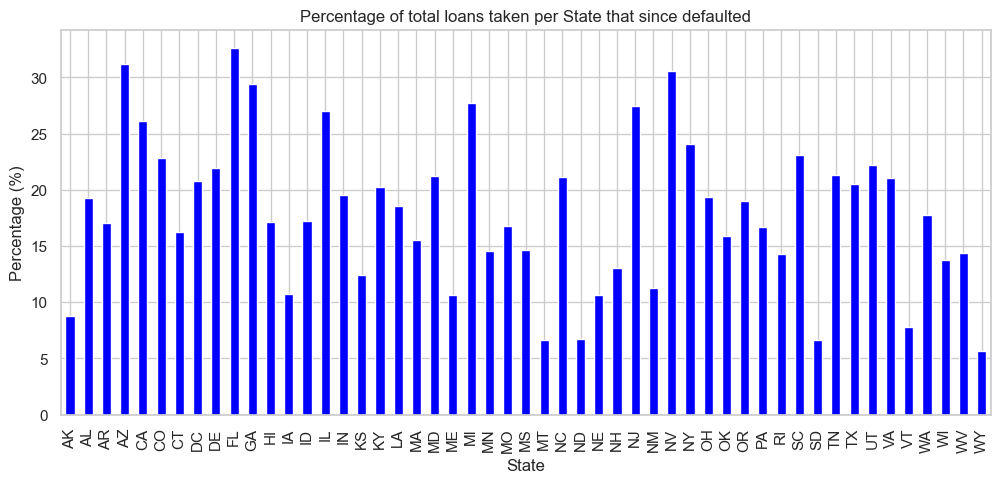

In [28]:
# Calculate the percentage of CHGOFF vs CHGOFF+PIF per year
pivot_table = df[df['State'] != 'AP'].pivot_table(index='State', columns='MIS_Status', aggfunc='size', fill_value=0)
pivot_table['Percentage'] = (pivot_table['CHGOFF'] / (pivot_table['CHGOFF'] + pivot_table['P I F'])) * 100

# Create a bar plot
plt.figure(figsize=(12, 5))  # Set the figure size
pivot_table['Percentage'].plot(kind='bar', color='blue')

# Set plot title and labels
plt.title('Percentage of total loans taken per State that since defaulted')
plt.xlabel('State')
plt.ylabel('Percentage (%)')

# Show the plot
plt.show()


Let's look at percentage of loans that are in default per Industry.

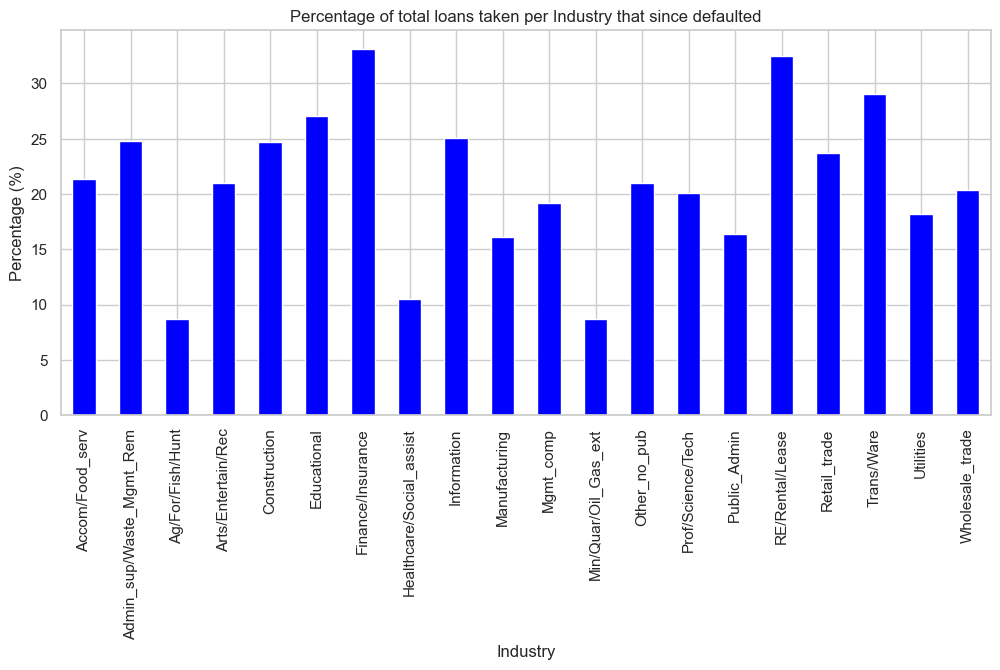

In [29]:
# Calculate the percentage of CHGOFF vs CHGOFF+PIF per year
pivot_table = df.pivot_table(index='Industry', columns='MIS_Status', aggfunc='size', fill_value=0)
pivot_table['Percentage'] = (pivot_table['CHGOFF'] / (pivot_table['CHGOFF'] + pivot_table['P I F'])) * 100

# Create a bar plot
plt.figure(figsize=(12, 5))  # Set the figure size
pivot_table['Percentage'].plot(kind='bar', color='blue')

# Set plot title and labels
plt.title('Percentage of total loans taken per Industry that since defaulted')
plt.xlabel('Industry')
plt.ylabel('Percentage (%)')

# Show the plot
plt.show()


There are a handful of Industries that have a very low rate of defaulted loans, otherwise there is not much variation in the rate of defaulted loans among the remaining industries.

Let's see if the increase in approved loans could be attributed to any industry.

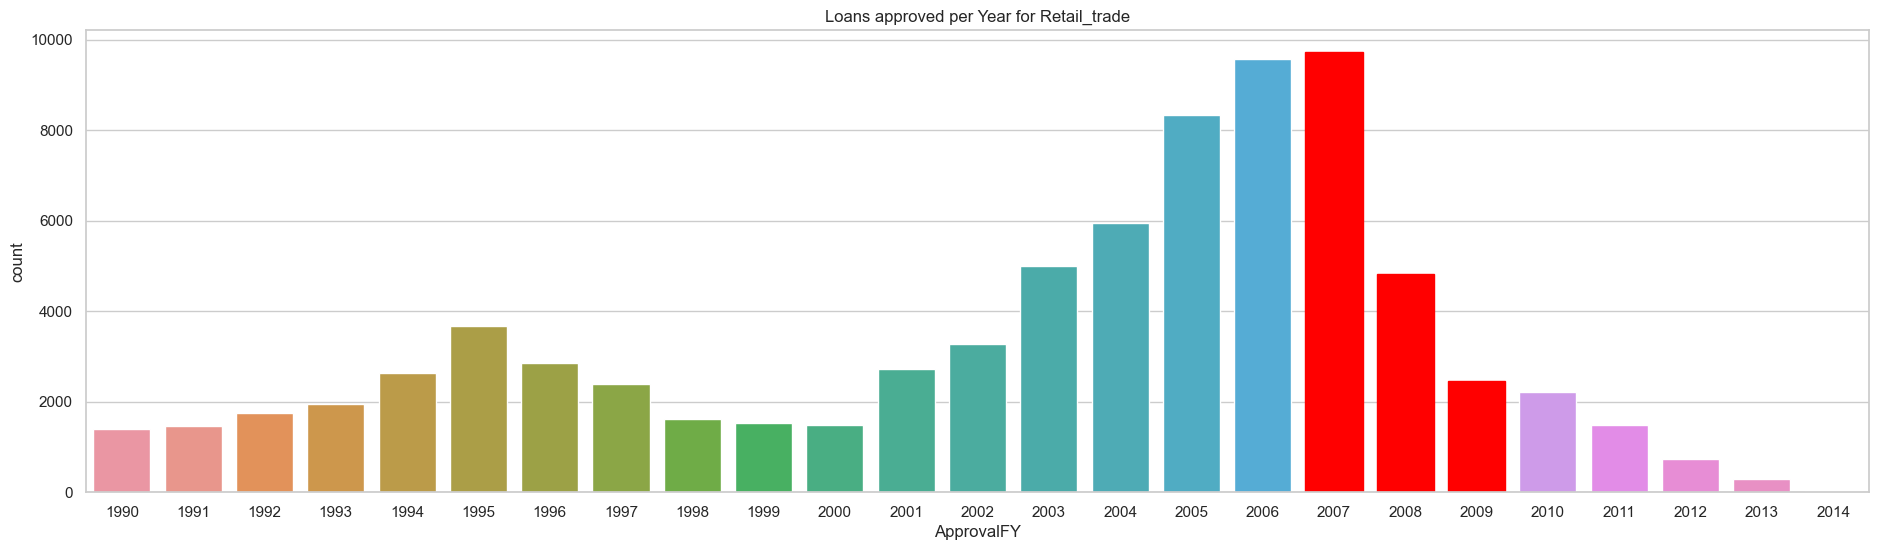

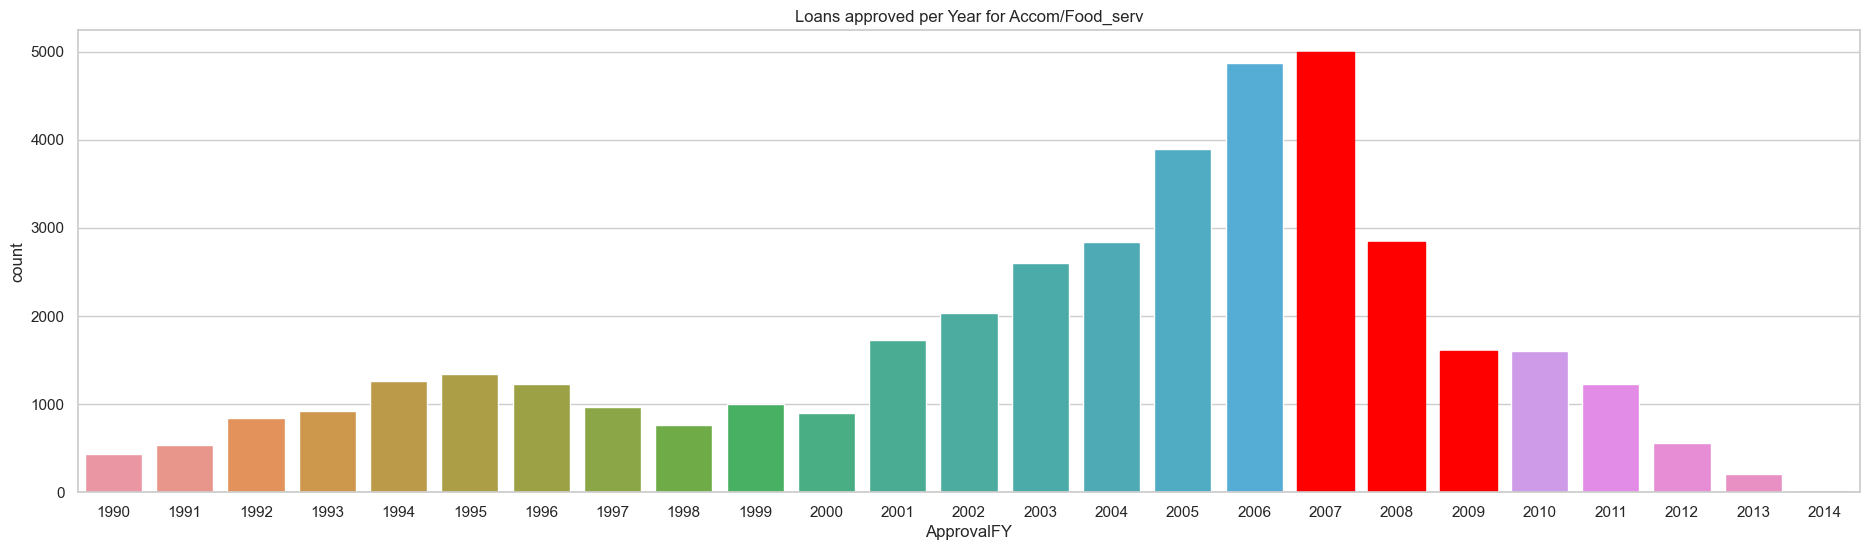

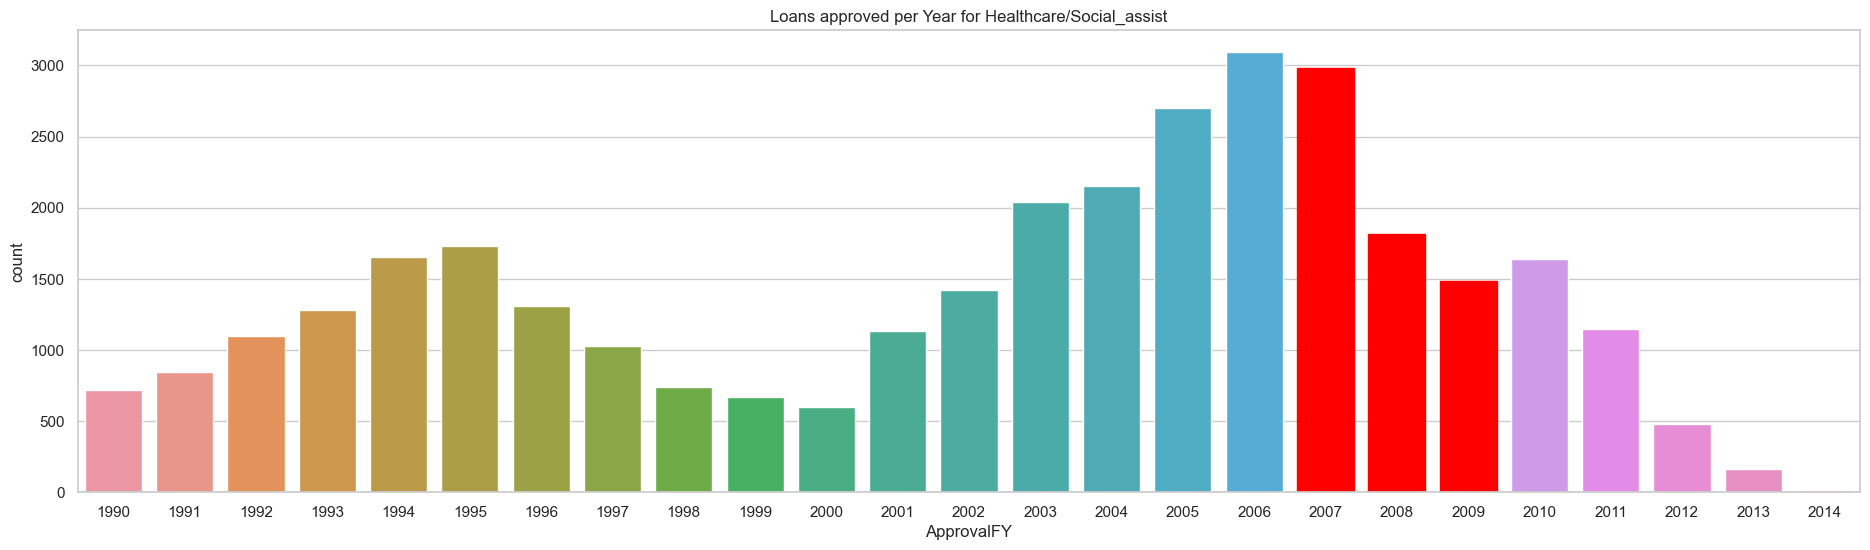

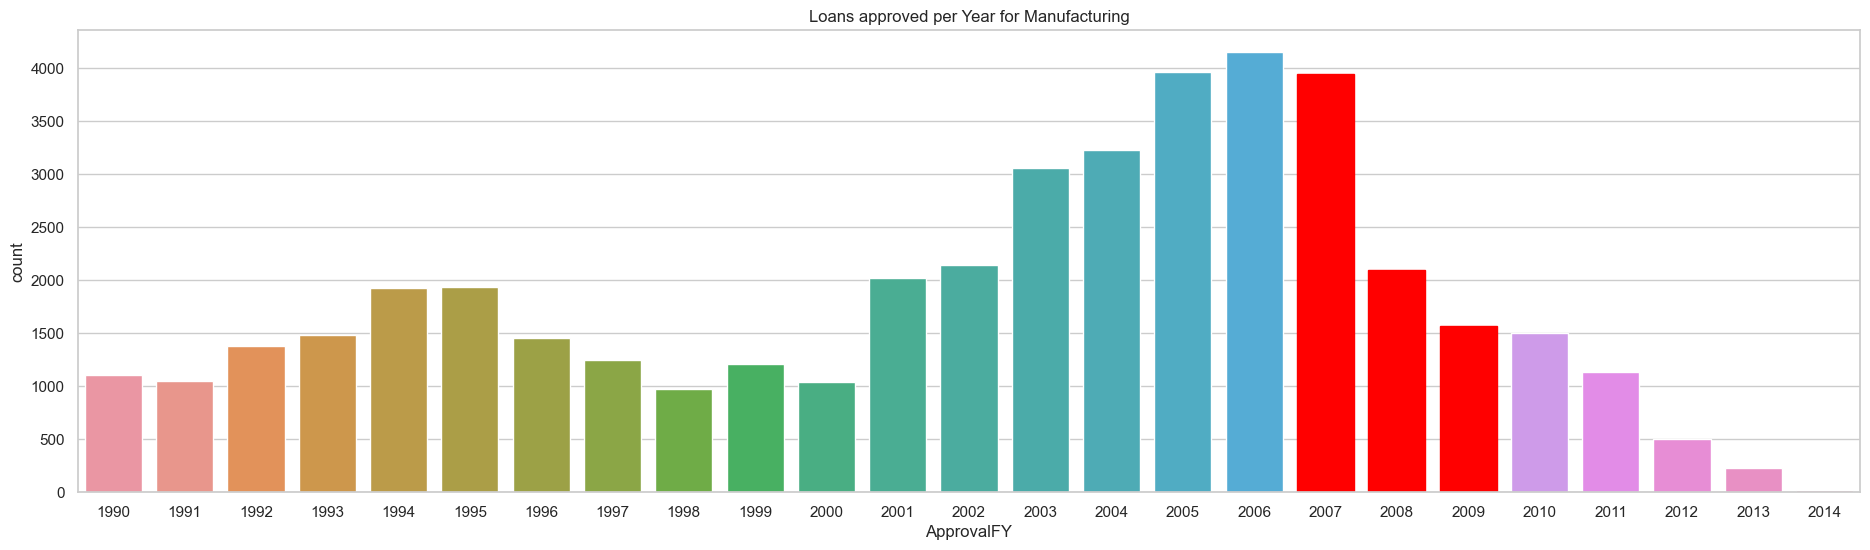

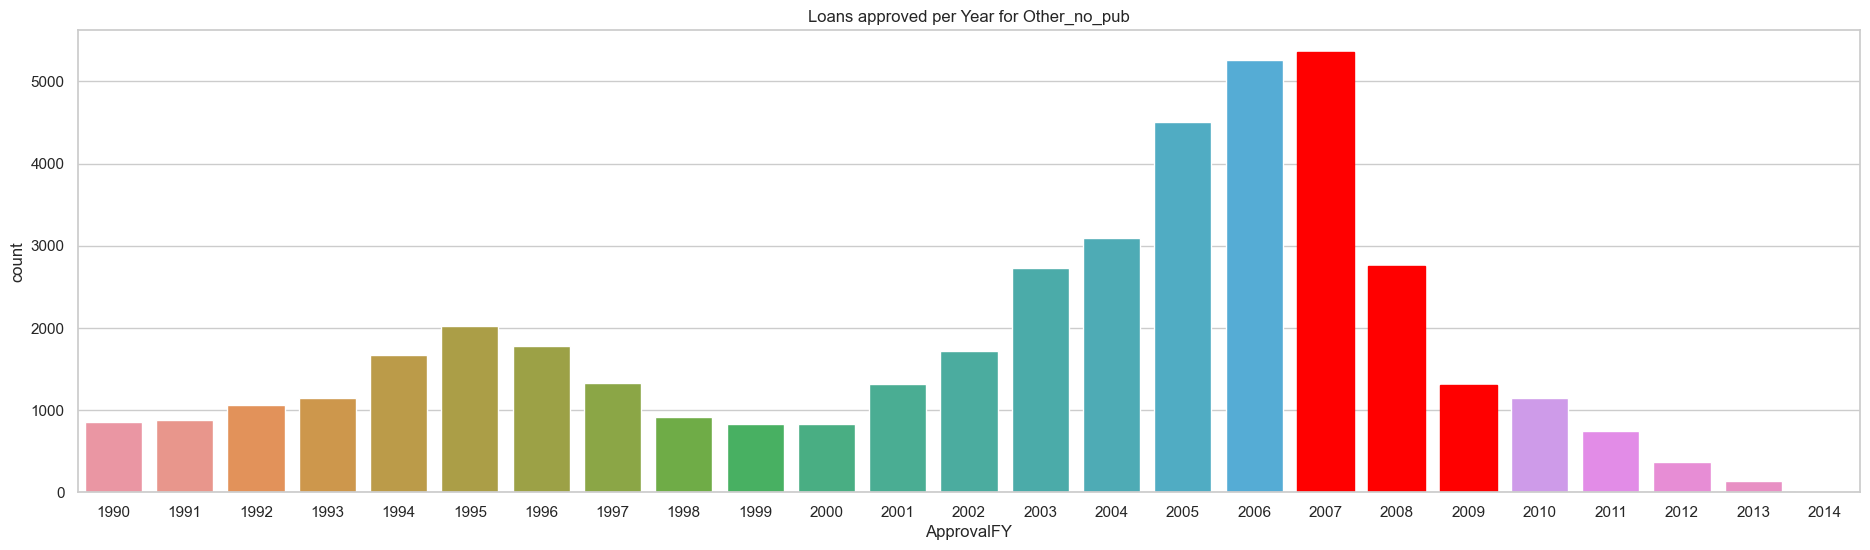

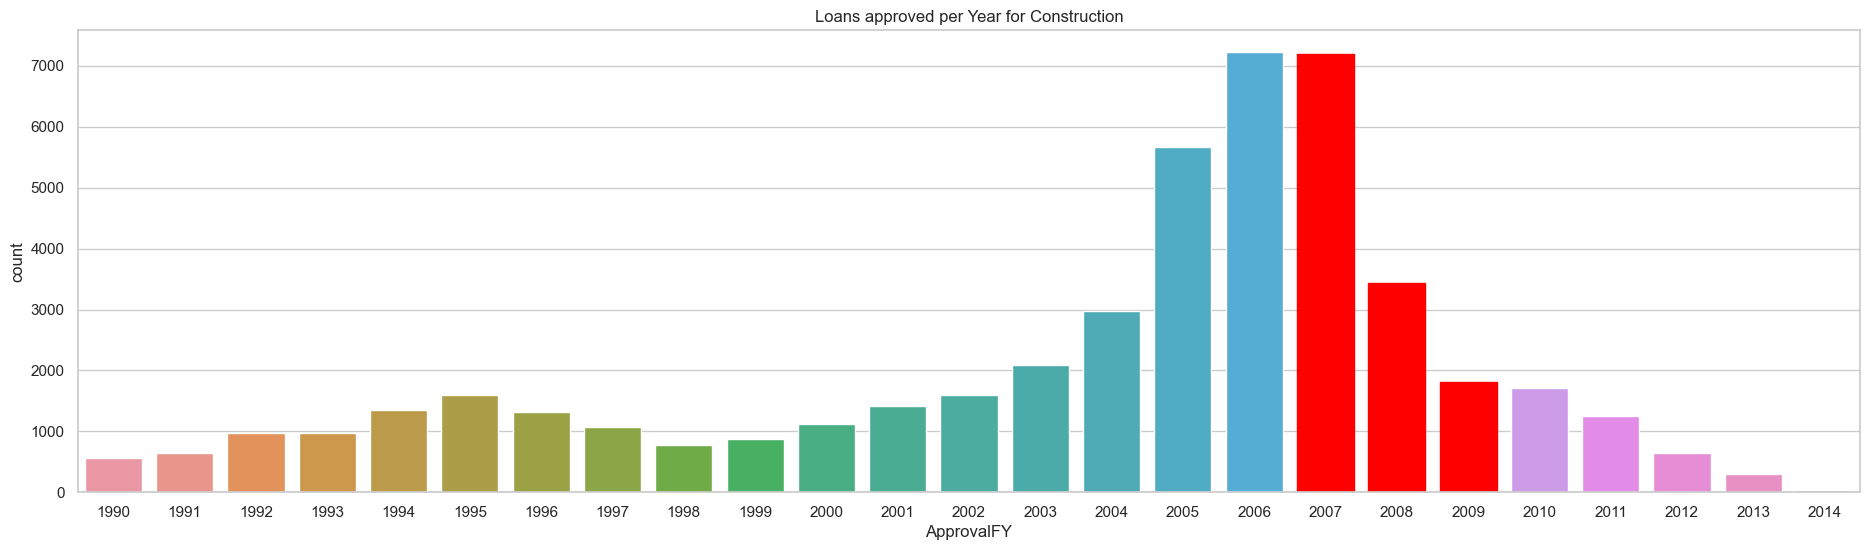

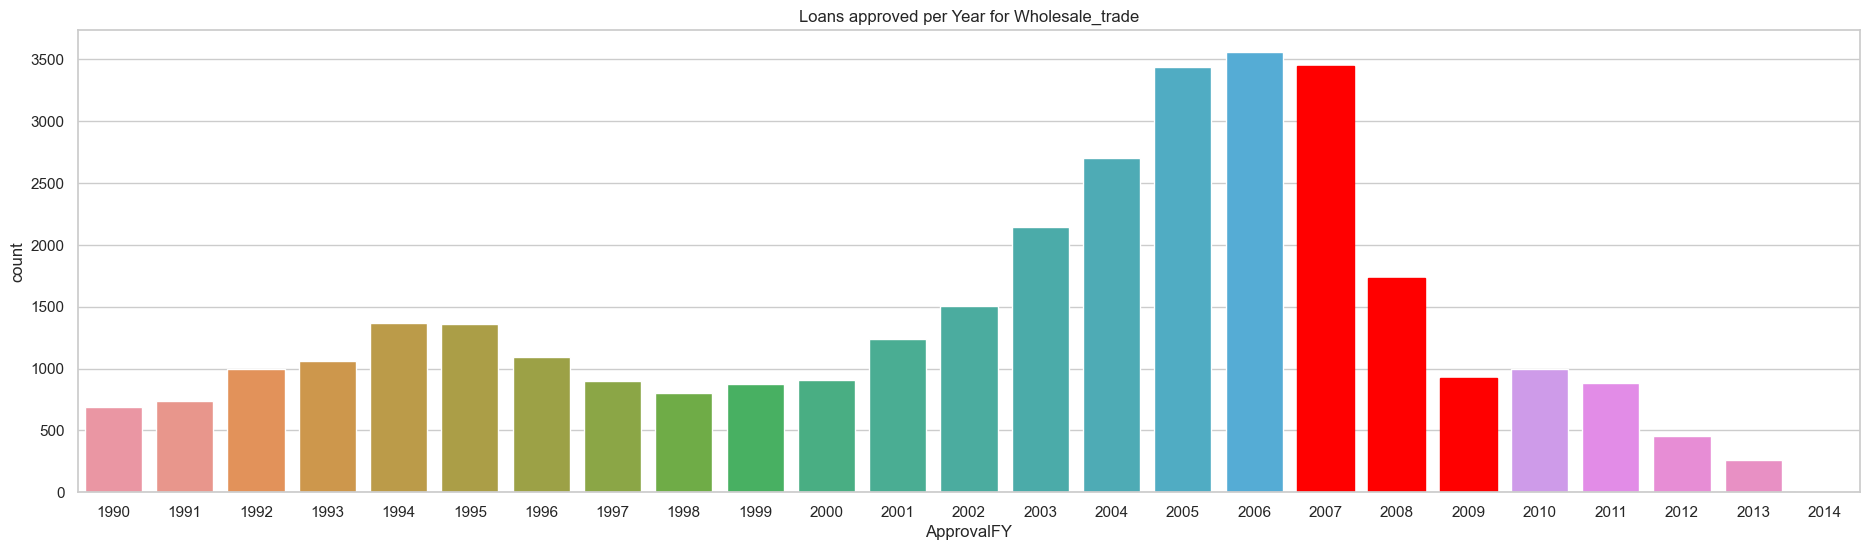

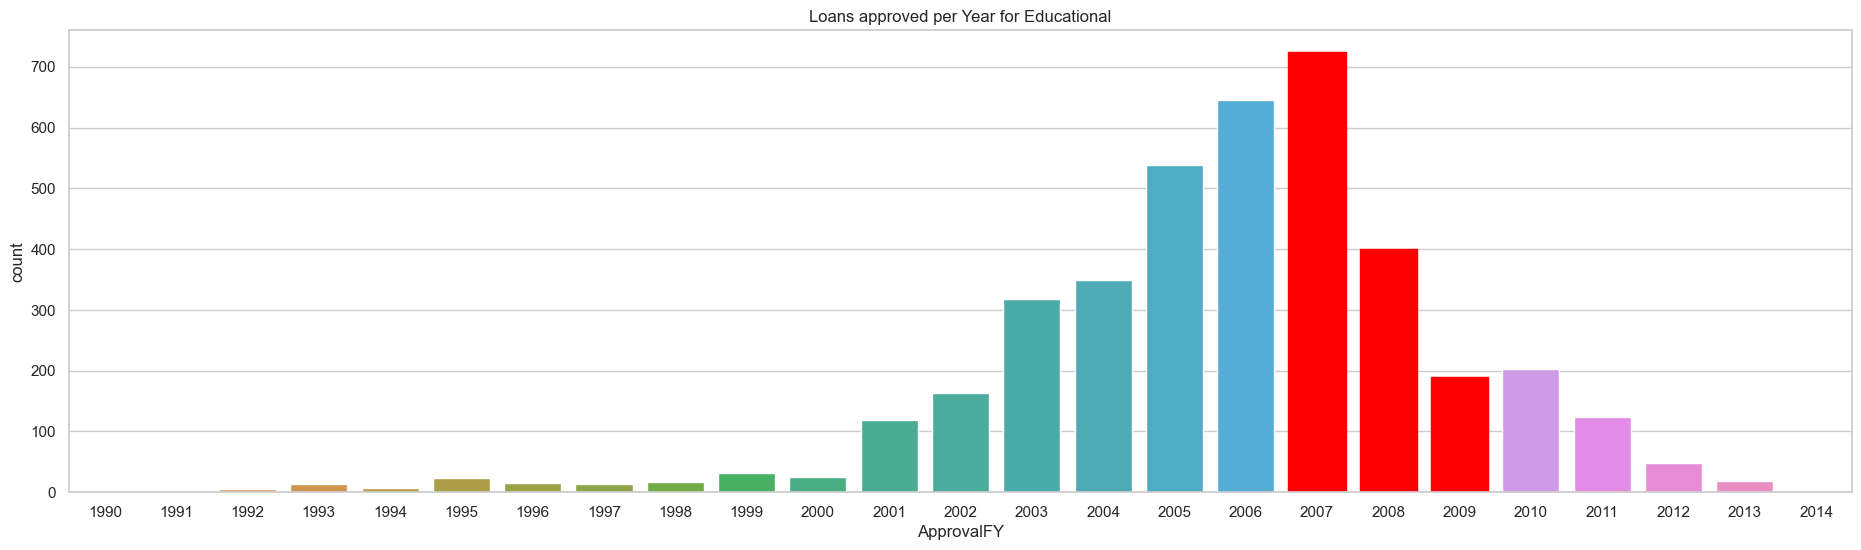

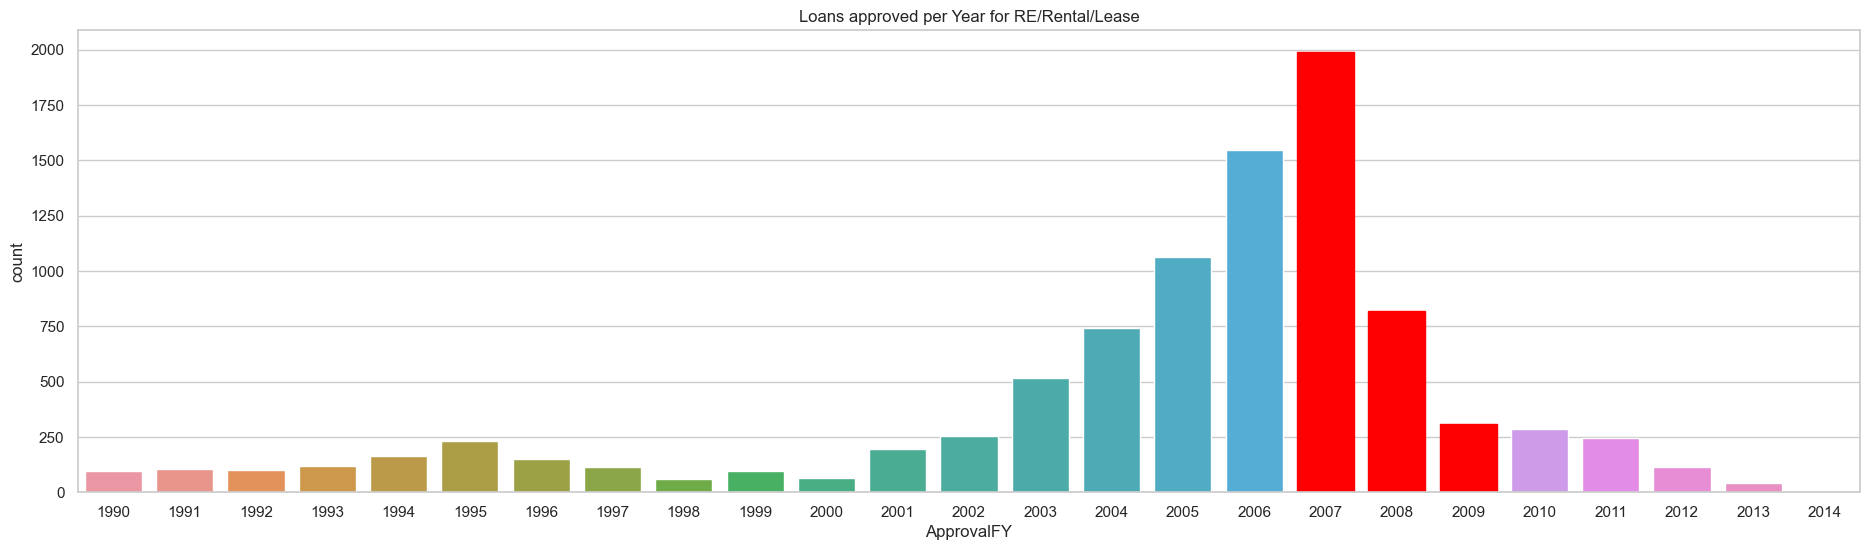

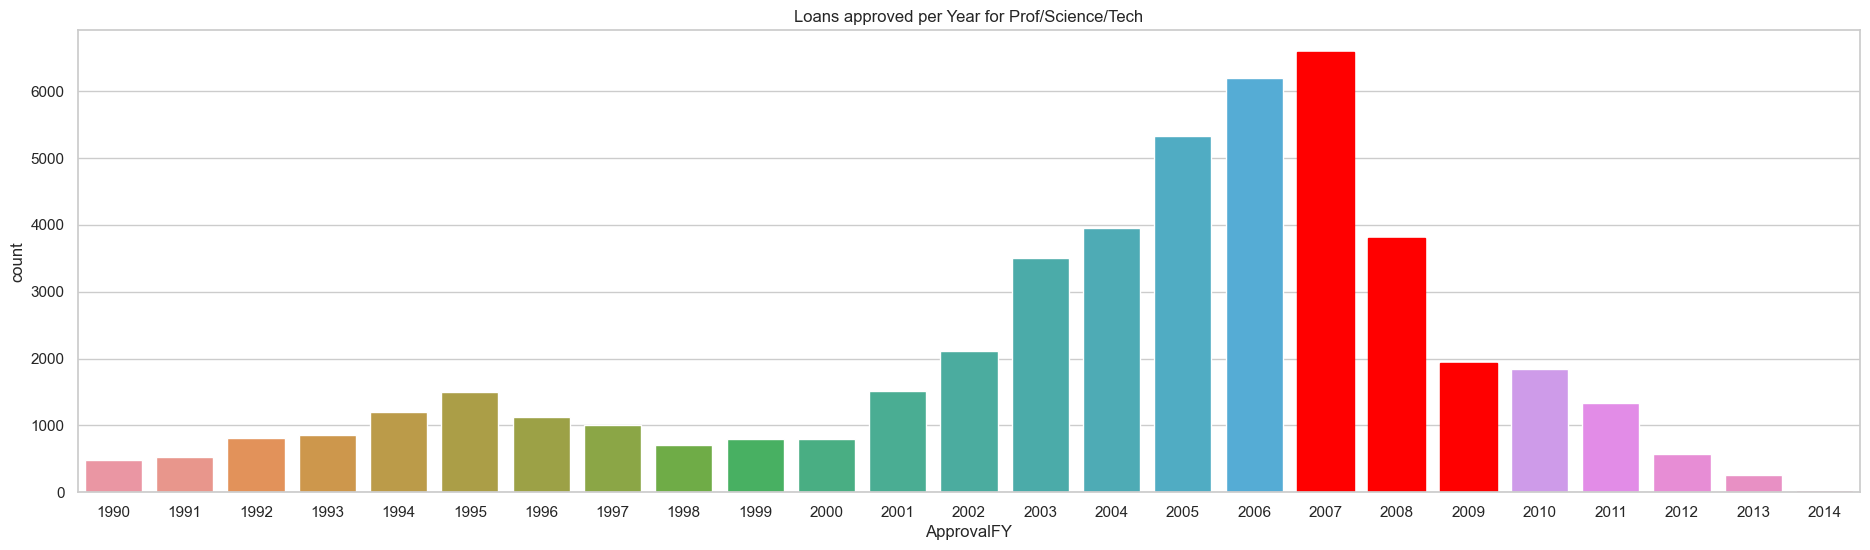

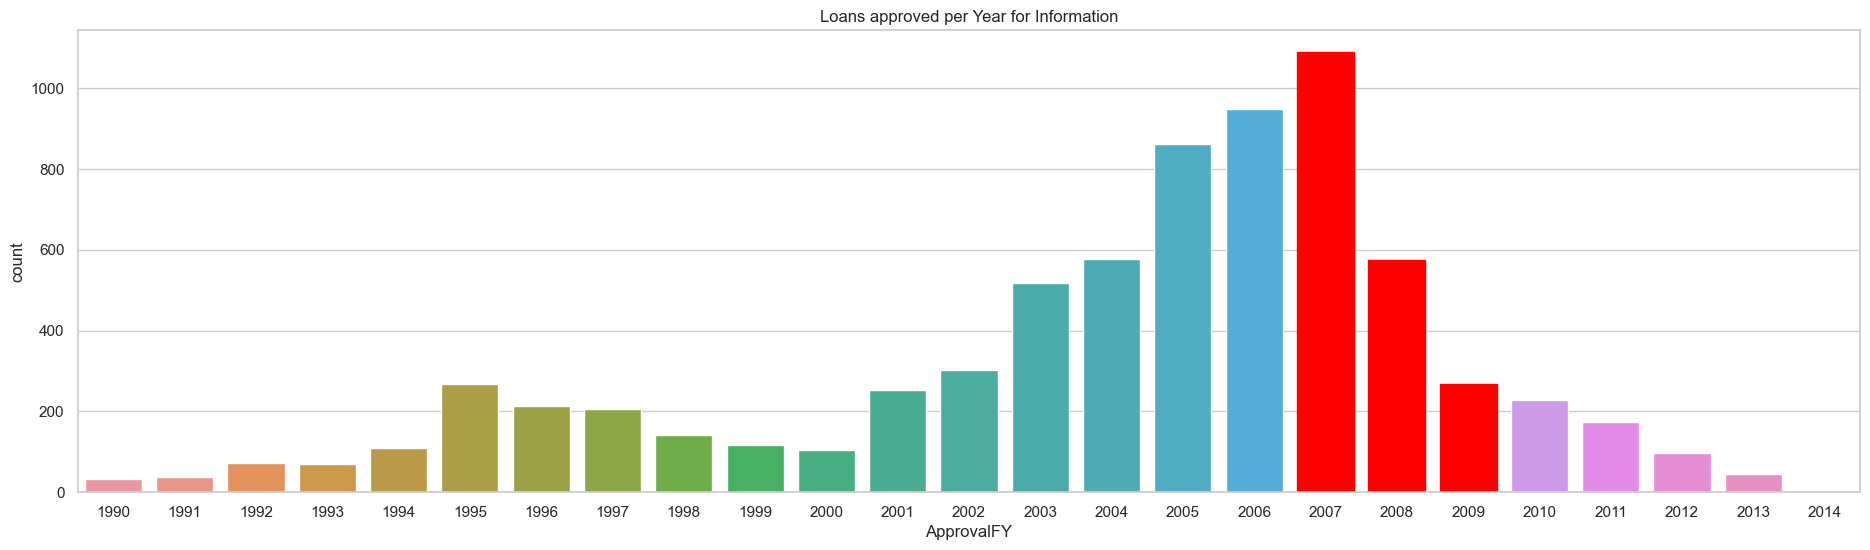

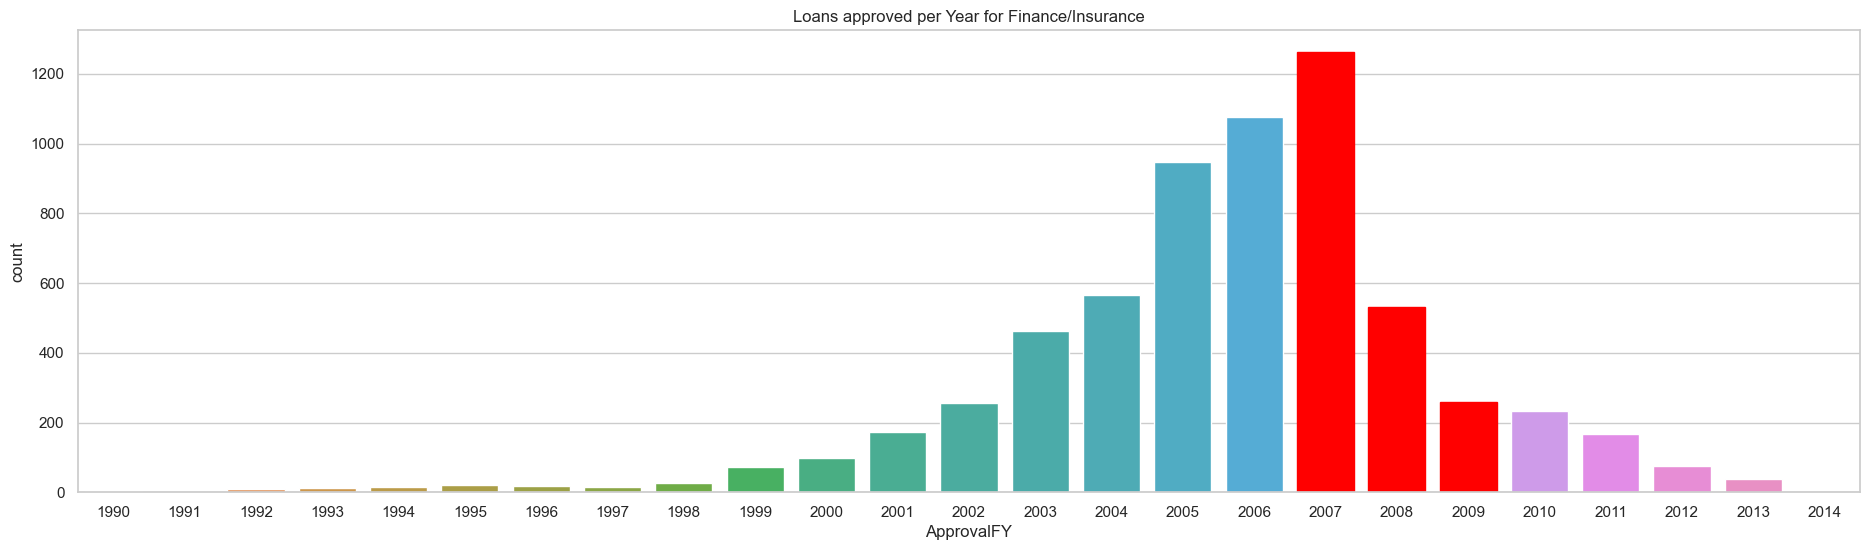

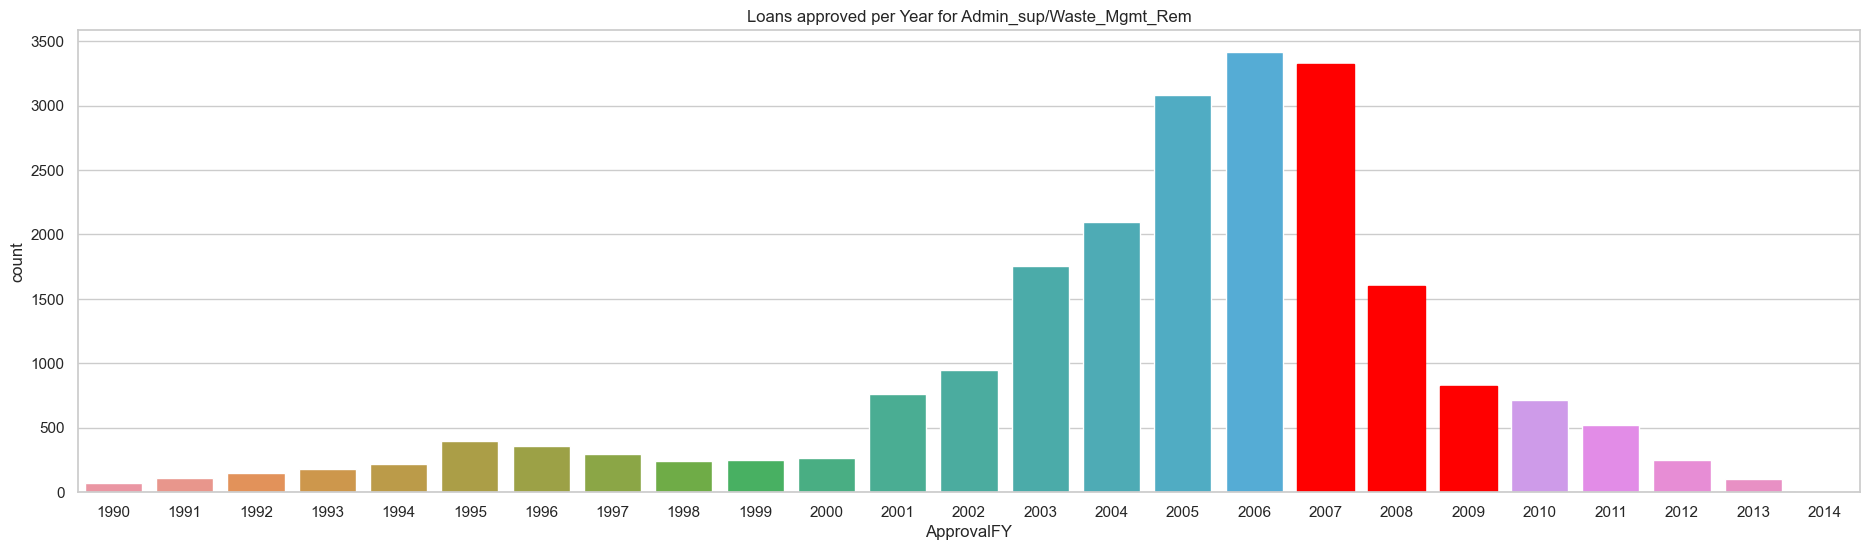

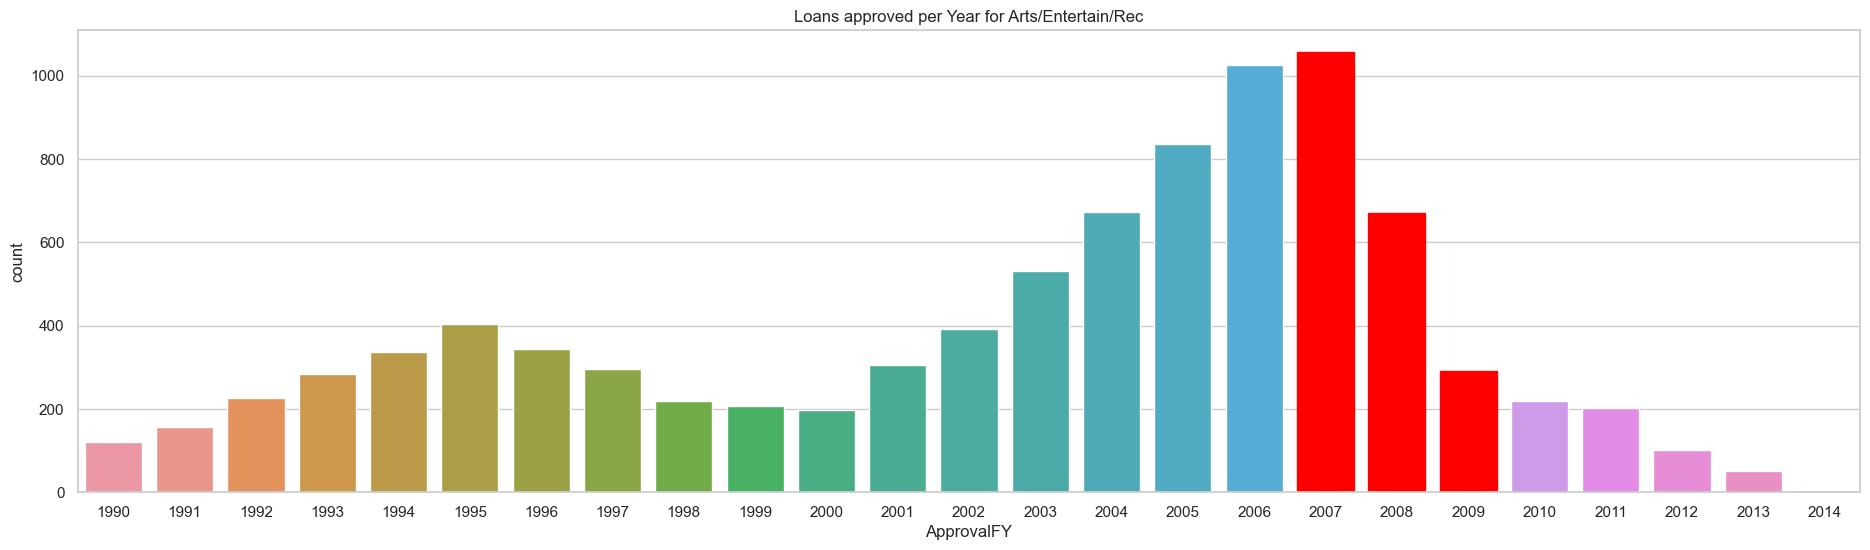

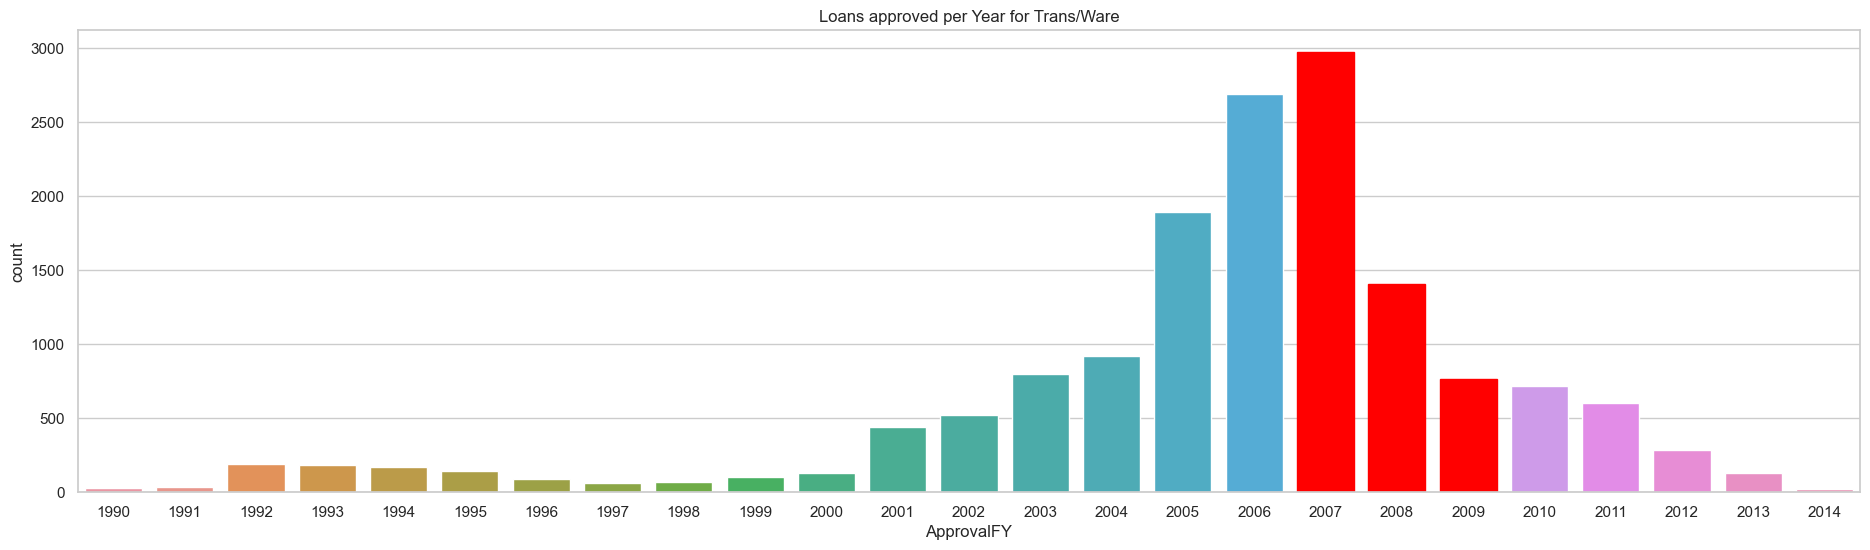

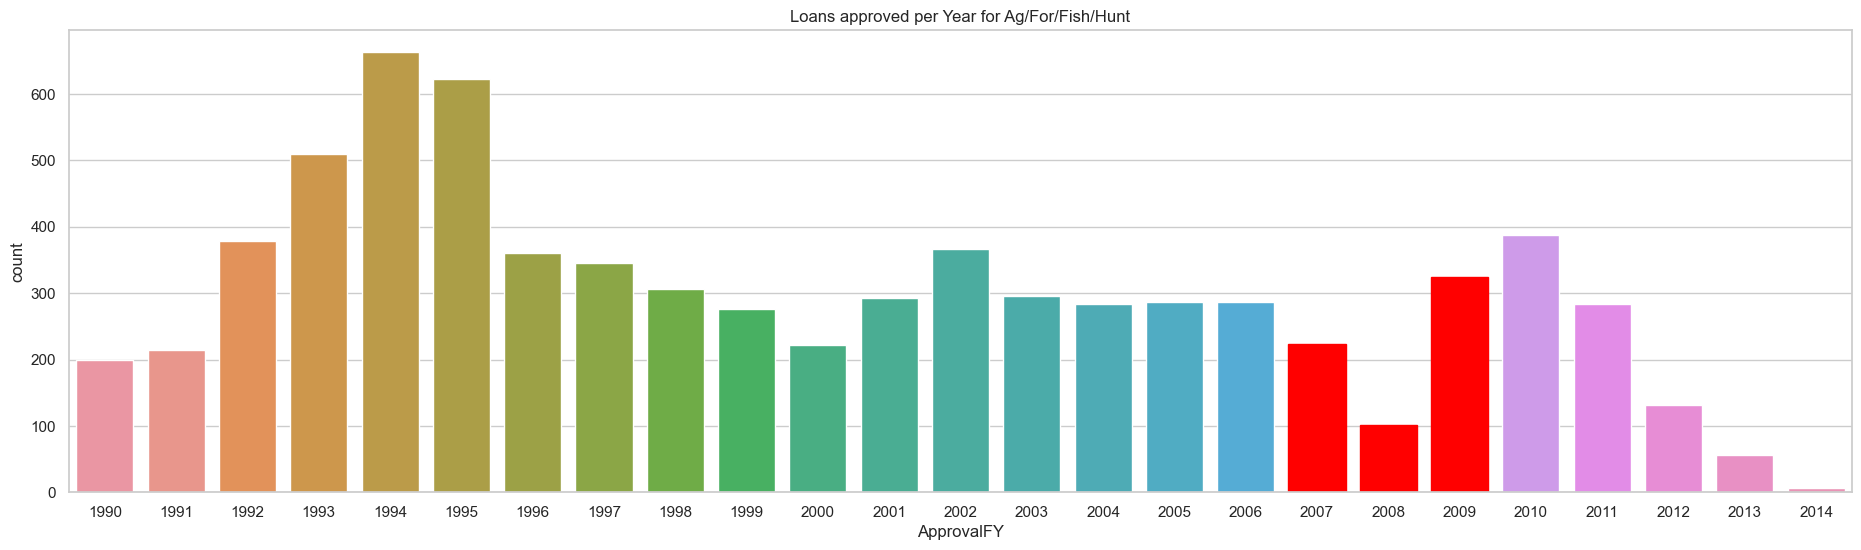

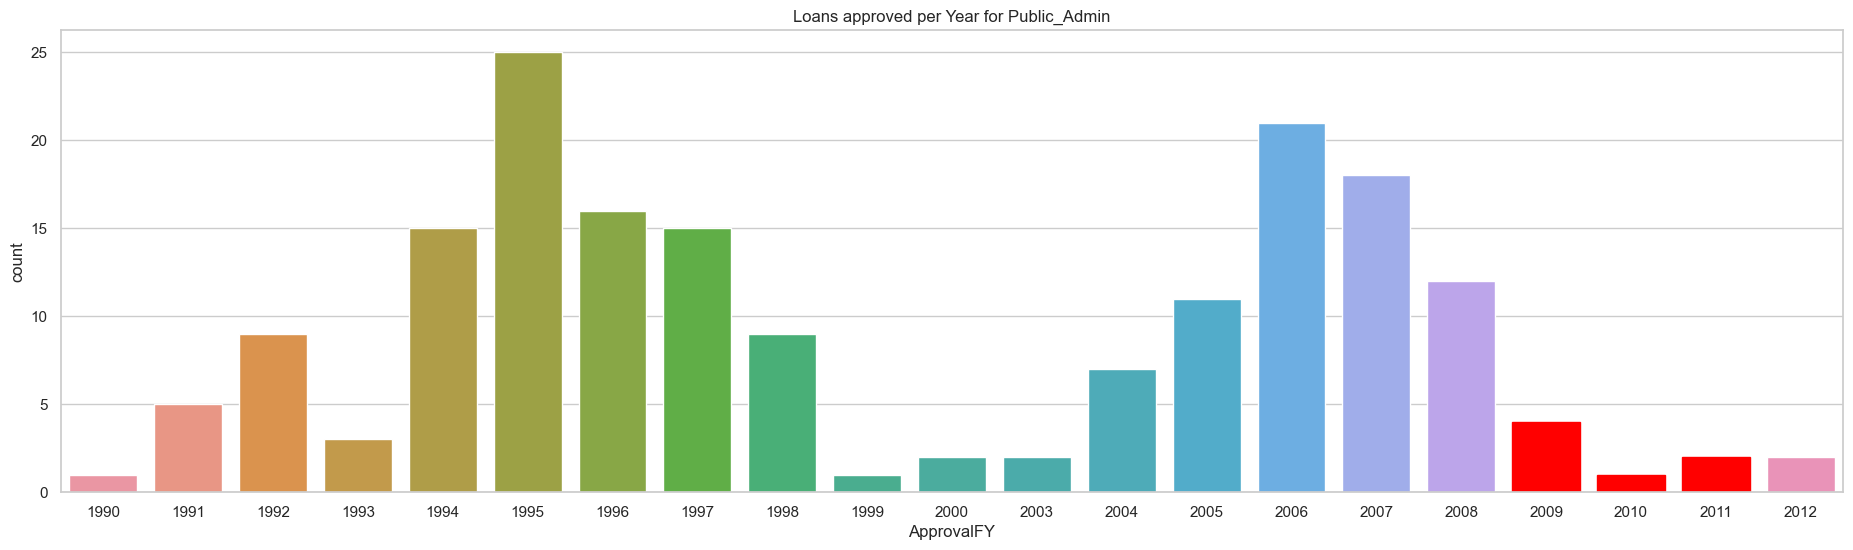

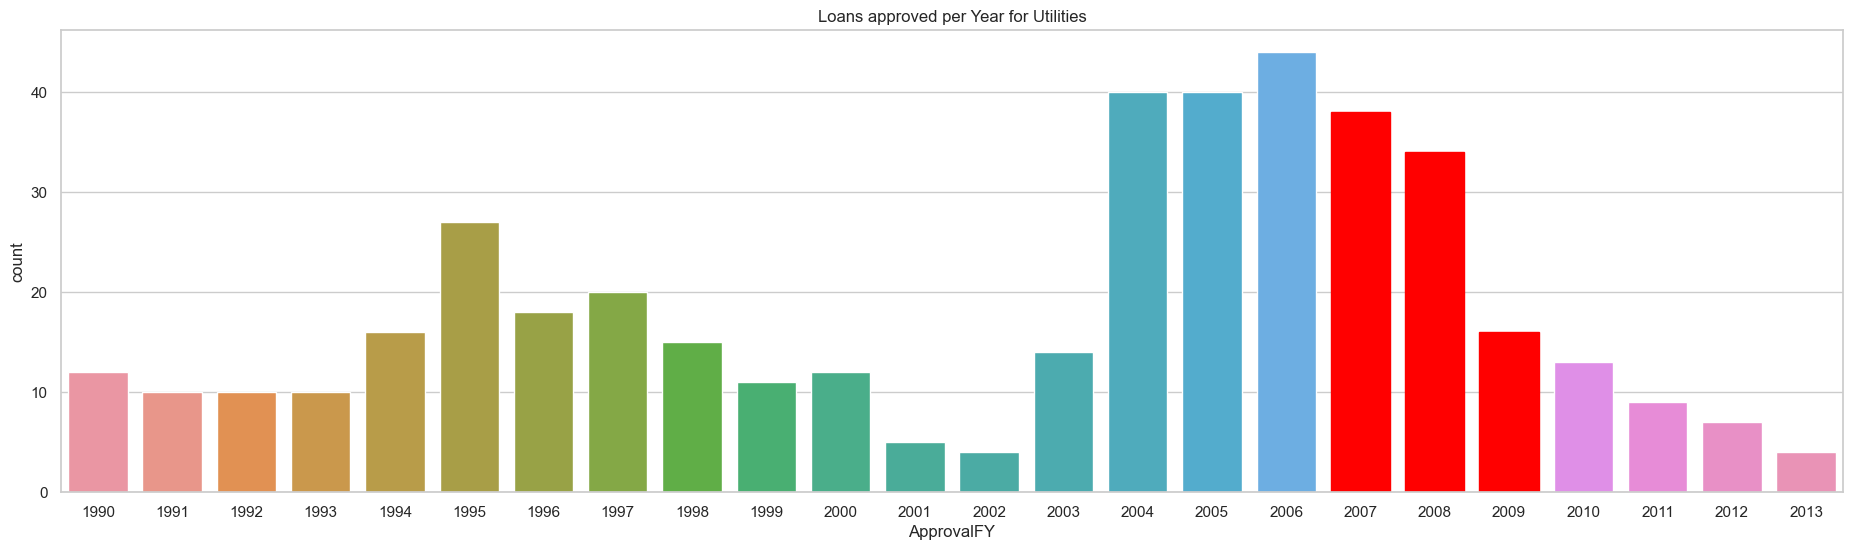

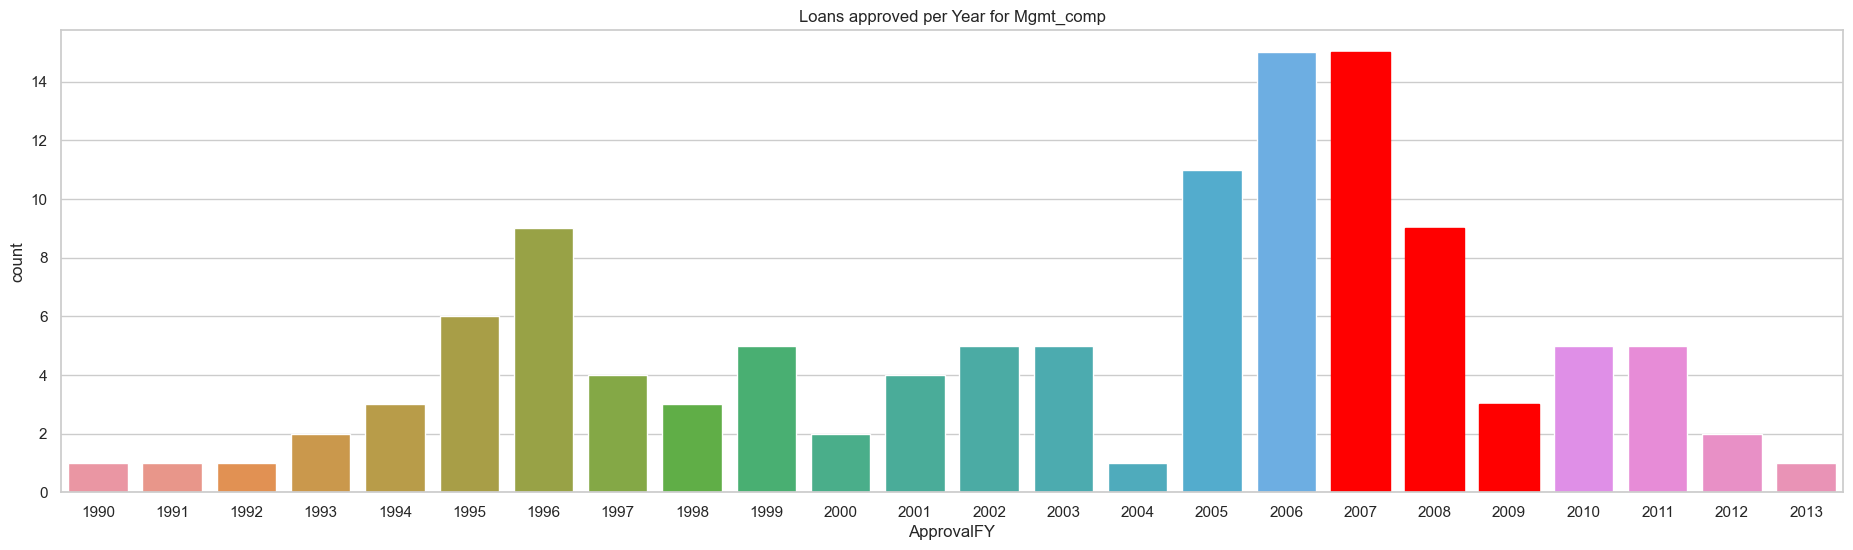

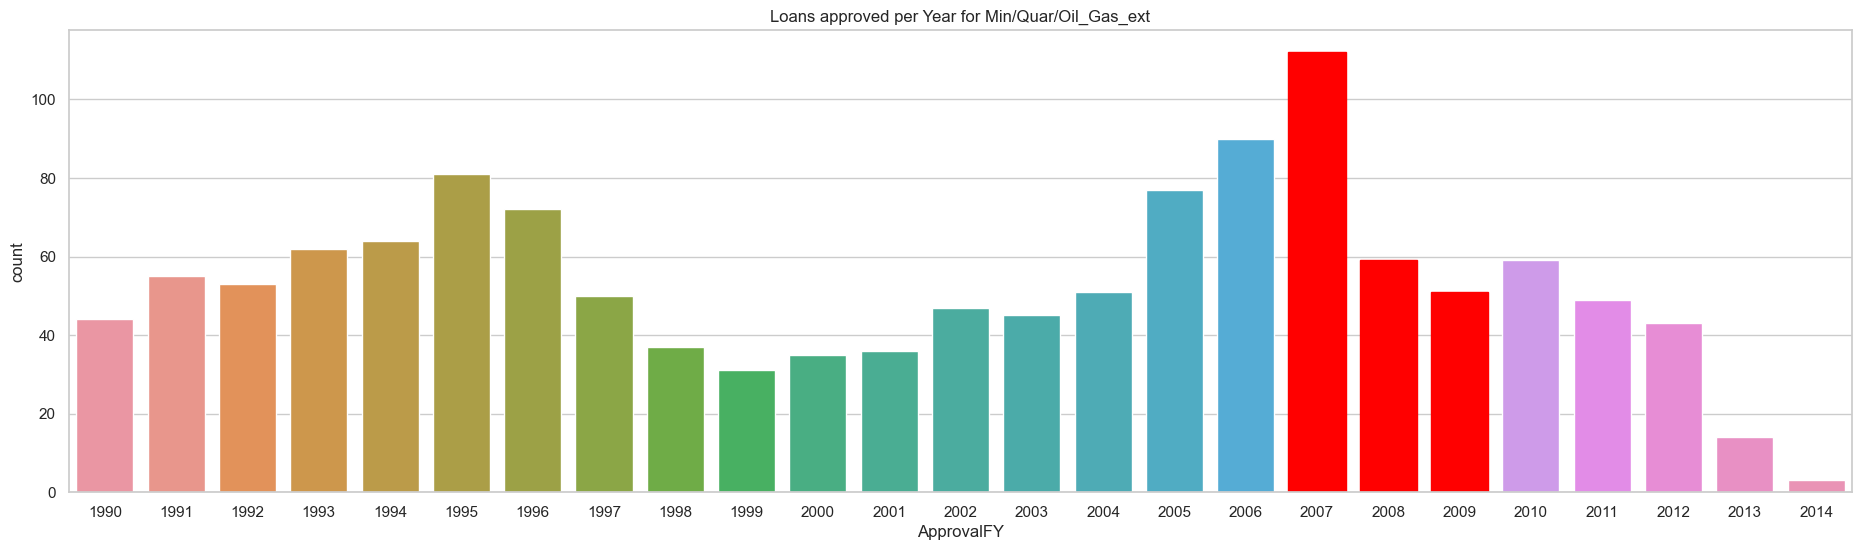

In [30]:
for indust in df['Industry'].unique():

  plt.figure(figsize=(23,6))
  ax = sns.barplot(x=df.loc[(df['Industry'] == indust) & (df['ApprovalFY'] > 1989), 'ApprovalFY'].value_counts().index, y=df.loc[(df['Industry'] == indust) & (df['ApprovalFY'] > 1989), 'ApprovalFY'].value_counts())


  # Highlight specific years
  highlight_years = [2007, 2008, 2009]
  for bar in ax.patches:
      if int(bar.get_x()) + 1991 in highlight_years:
          bar.set_color('red')

  # Set plot title and labels
  plt.title("Loans approved per Year for " + indust)

  # Show the plot
  plt.show()


Almost all industries had significant increases in the number of approved loans.

In [31]:
df.head()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,Industry,ChgOffFY
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,45,28-Feb-97,1997,84,4,2,0,0,0,0,N,Y,NaT,28-Feb-99,60000.0,0.0,P I F,0.0,60000.0,48000.0,Retail_trade,9999
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,72,28-Feb-97,1997,60,2,2,0,0,0,0,N,Y,NaT,31-May-97,40000.0,0.0,P I F,0.0,40000.0,32000.0,Accom/Food_serv,9999
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,62,28-Feb-97,1997,180,7,1,0,0,0,0,N,N,NaT,31-Dec-97,287000.0,0.0,P I F,0.0,287000.0,215250.0,Healthcare/Social_assist,9999
3,1000084002,"B&T SCREW MACHINE COMPANY, INC",PLAINVILLE,CT,6062,"TD BANK, NATIONAL ASSOCIATION",DE,33,28-Feb-97,1997,120,19,1,0,0,0,0,N,N,NaT,30-Jun-97,517000.0,0.0,P I F,0.0,517000.0,387750.0,Manufacturing,9999
4,1000094005,WEAVER PRODUCTS,SUMMERFIELD,FL,34491,REGIONS BANK,AL,81,28-Feb-97,1997,84,1,2,0,0,0,0,N,Y,NaT,30-Jun-98,45000.0,0.0,P I F,0.0,45000.0,36000.0,Other_no_pub,9999


Let's look at rate of loans in default per State where the bank is located.

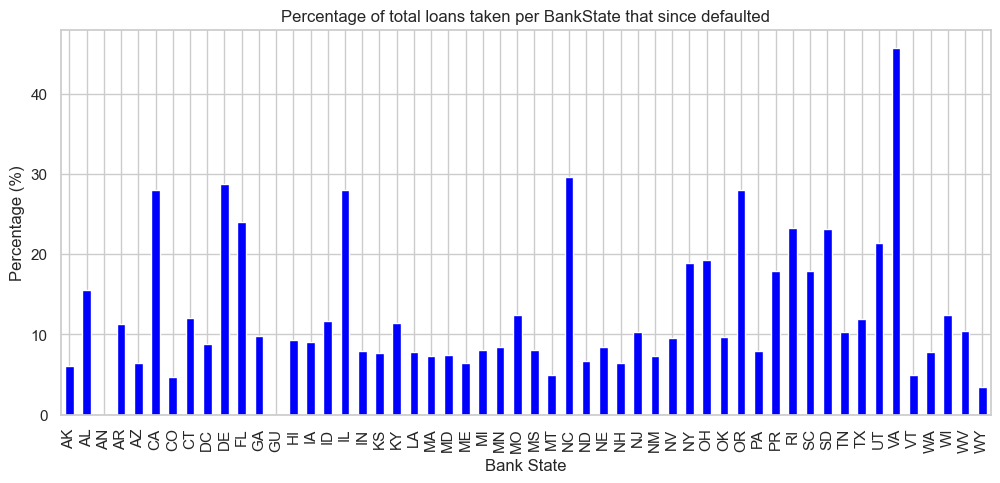

In [32]:
# Calculate the percentage of CHGOFF vs CHGOFF+PIF per year
pivot_table = df.pivot_table(index='BankState', columns='MIS_Status', aggfunc='size', fill_value=0)
pivot_table['Percentage'] = (pivot_table['CHGOFF'] / (pivot_table['CHGOFF'] + pivot_table['P I F'])) * 100

# Create a bar plot
plt.figure(figsize=(12, 5))  # Set the figure size
pivot_table['Percentage'].plot(kind='bar', color='blue')

# Set plot title and labels
plt.title('Percentage of total loans taken per BankState that since defaulted')
plt.xlabel('Bank State')
plt.ylabel('Percentage (%)')

# Show the plot
plt.show()


We see that there are some States that have a much higher rate of loans in default than others. This may be due to differences in regulations in the various States.

We now need to prep the data for predictive Analysis. Let's create a copy of the data to work with.

In [33]:
df_copy = df.copy()

Let's create a new column that contains the time taken (months) for a loan to be disbursed after it is approved, and drop the ApprovalDate and DisbursementDate columns.

In [34]:
df_copy['ApprovalDate'] = pd.to_datetime(df_copy['ApprovalDate'], format='%d-%b-%y')
df_copy['DisbursementDate'] = pd.to_datetime(df_copy['DisbursementDate'], format='%d-%b-%y')

# Calculate the difference in months
df_copy['TimeApp2Dis'] = ((df_copy['DisbursementDate'] - df_copy['ApprovalDate']).dt.days / 30.44).astype(int)

# Print the modified DataFrame
df_copy


,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,Industry,ChgOffFY,TimeApp2Dis
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,45,1997-02-28,1997,84,4,2,0,0,0,0,N,Y,NaT,1999-02-28,60000.0,0.0,P I F,0.0,60000.0,48000.0,Retail_trade,9999,23
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,72,1997-02-28,1997,60,2,2,0,0,0,0,N,Y,NaT,1997-05-31,40000.0,0.0,P I F,0.0,40000.0,32000.0,Accom/Food_serv,9999,3
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,62,1997-02-28,1997,180,7,1,0,0,0,0,N,N,NaT,1997-12-31,287000.0,0.0,P I F,0.0,287000.0,215250.0,Healthcare/Social_assist,9999,10
3,1000084002,"B&T SCREW MACHINE COMPANY, INC",PLAINVILLE,CT,6062,"TD BANK, NATIONAL ASSOCIATION",DE,33,1997-02-28,1997,120,19,1,0,0,0,0,N,N,NaT,1997-06-30,517000.0,0.0,P I F,0.0,517000.0,387750.0,Manufacturing,9999,4
4,1000094005,WEAVER PRODUCTS,SUMMERFIELD,FL,34491,REGIONS BANK,AL,81,1997-02-28,1997,84,1,2,0,0,0,0,N,Y,NaT,1998-06-30,45000.0,0.0,P I F,0.0,45000.0,36000.0,Other_no_pub,9999,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465035,9995233007,"M L B CONSTRUCTION, INC.",ELLICOTT,MD,21043,WELLS FARGO BANK NATL ASSOC,CA,23,1997-02-27,1997,60,5,1,0,0,0,0,Y,N,NaT,1997-03-31,25000.0,0.0,P I F,0.0,25000.0,12500.0,Construction,9999,1
465036,9995263005,HILL AND SONS INC.,OAKLAND,CA,94603,MORTGAGE CAP. DEVEL CORP,CA,32,1997-02-27,1997,240,8,1,4,0,0,0,N,N,NaT,1997-08-13,189000.0,0.0,P I F,0.0,189000.0,189000.0,Manufacturing,9999,5
465037,9995493004,PULLTARPS MFG.,EL CAJON,CA,92020,U.S. BANK NATIONAL ASSOCIATION,CA,31,1997-02-27,1997,36,40,1,0,0,0,0,N,N,NaT,1997-03-31,200000.0,0.0,P I F,0.0,200000.0,150000.0,Manufacturing,9999,1
465038,9995603000,FABRIC FARMS,COLUMBUS,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,45,1997-02-27,1997,60,6,1,0,0,0,0,Y,N,NaT,1997-10-31,85000.0,0.0,P I F,0.0,85000.0,42500.0,Retail_trade,9999,8


In [35]:
df_copy['TimeApp2Dis'].min()

-118

In [36]:
df_copy = df_copy[~df_copy['TimeApp2Dis'] < 0]

Let's drop LoanNr_ChkDgt, Name, City, Zip and Bank as there are too many unique values and would add too many features to our model. We also drop State and Industry as there isn't much difference in the rate of loans in default per State or per Industry.

In [37]:
df_copy = df_copy.drop(columns=['LoanNr_ChkDgt', 'Name', 'City', 'Zip', 'Bank', 'Industry'])

For Bank State, in an effort to keep the number of features to a minimum, any State with rate of defaulted loans below 13% are grouped together by renaming those States to "Other State". We then use get_dummies to create additional features for each State as well as "Other State".

We also set MIS_Status to 1 if a loan is in default, and 0 if it is not.

In [38]:
df_copy['MIS_Status'] = df_copy['MIS_Status'].map({"CHGOFF":1,"P I F":0})
df_copy['RevLineCr'] = df_copy['RevLineCr'].map({"Y":1,"N":0})
df_copy['LowDoc'] = df_copy['LowDoc'].map({"Y":1,"N":0})

df_copy['State'] = df_copy['State'].replace("AK","State_South")
df_copy['BankState'] = df_copy['BankState'].replace("AK","BankState_South")

df_copy['State'] = df_copy['State'].replace("AL","State_South")
df_copy['BankState'] = df_copy['BankState'].replace("AL","BankState_South")

df_copy['State'] = df_copy['State'].replace("AR","State_South")
df_copy['BankState'] = df_copy['BankState'].replace("AR","BankState_South")

df_copy['State'] = df_copy['State'].replace("AZ","State_West")
df_copy['BankState'] = df_copy['BankState'].replace("AZ","BankState_West")

df_copy['State'] = df_copy['State'].replace("CO","State_West")
df_copy['BankState'] = df_copy['BankState'].replace("CO","BankState_West")

df_copy['State'] = df_copy['State'].replace("CT","State_NorthEast")
df_copy['BankState'] = df_copy['BankState'].replace("CT","BankState_NorthEast")

df_copy['State'] = df_copy['State'].replace("GA","State_South")
df_copy['BankState'] = df_copy['BankState'].replace("GA","BankState_South")

df_copy['State'] = df_copy['State'].replace("HI","State_West")
df_copy['BankState'] = df_copy['BankState'].replace("HI","BankState_West")

df_copy['State'] = df_copy['State'].replace("IA","State_MidWest")
df_copy['BankState'] = df_copy['BankState'].replace("IA","BankState_MidWest")

df_copy['State'] = df_copy['State'].replace("ID","State_West")
df_copy['BankState'] = df_copy['BankState'].replace("ID","BankState_West")

df_copy['State'] = df_copy['State'].replace("IN","State_MidWest")
df_copy['State'] = df_copy['State'].replace("KS","State_MidWest")
df_copy['State'] = df_copy['State'].replace("LA","State_South")
df_copy['State'] = df_copy['State'].replace("MA","State_NorthEast")
df_copy['State'] = df_copy['State'].replace("MD","State_NorthEast")
df_copy['State'] = df_copy['State'].replace("ME","State_NorthEast")
df_copy['State'] = df_copy['State'].replace("MI","State_MidWest")
df_copy['State'] = df_copy['State'].replace("MN","State_MidWest")
df_copy['State'] = df_copy['State'].replace("MS","State_South")
df_copy['State'] = df_copy['State'].replace("ND","State_MidWest")
df_copy['State'] = df_copy['State'].replace("NE","State_MidWest")
df_copy['State'] = df_copy['State'].replace("NH","State_NorthEast")
df_copy['State'] = df_copy['State'].replace("NJ","State_NorthEast")
df_copy['State'] = df_copy['State'].replace("NM","State_West")
df_copy['State'] = df_copy['State'].replace("NV","State_West")
df_copy['State'] = df_copy['State'].replace("OK","State_South")
df_copy['State'] = df_copy['State'].replace("PA","State_NorthEast")
df_copy['State'] = df_copy['State'].replace("VT","State_NorthEast")
df_copy['State'] = df_copy['State'].replace("WA","State_West")
df_copy['State'] = df_copy['State'].replace("WY","State_West")
df_copy['State'] = df_copy['State'].replace("FL","State_South")
df_copy['State'] = df_copy['State'].replace("NC","State_South")
df_copy['State'] = df_copy['State'].replace("IL","State_MidWest")
df_copy['State'] = df_copy['State'].replace("OH","State_MidWest")
df_copy['State'] = df_copy['State'].replace("WI","State_MidWest")
df_copy['State'] = df_copy['State'].replace("MO","State_MidWest")
df_copy['State'] = df_copy['State'].replace("SD","State_MidWest")
df_copy['State'] = df_copy['State'].replace("RI","State_NorthEast")
df_copy['State'] = df_copy['State'].replace("NY","State_NorthEast")
df_copy['State'] = df_copy['State'].replace("DE","State_NorthEast")
df_copy['State'] = df_copy['State'].replace("TX","State_South")
df_copy['State'] = df_copy['State'].replace("VA","State_South")
df_copy['State'] = df_copy['State'].replace("TN","State_South")
df_copy['State'] = df_copy['State'].replace("CA","State_West")
df_copy['State'] = df_copy['State'].replace("UT","State_West")
df_copy['State'] = df_copy['State'].replace("OR","State_West")
df_copy['State'] = df_copy['State'].replace("MT","State_West")
df_copy['State'] = df_copy['State'].replace("SC","State_South")
df_copy['State'] = df_copy['State'].replace("WV","State_South")
df_copy['State'] = df_copy['State'].replace("KY","State_South")

df_copy['BankState'] = df_copy['BankState'].replace("CA","BankState_West")
df_copy['BankState'] = df_copy['BankState'].replace("UT","BankState_West")
df_copy['BankState'] = df_copy['BankState'].replace("OR","BankState_West")
df_copy['BankState'] = df_copy['BankState'].replace("MT","BankState_West")
df_copy['BankState'] = df_copy['BankState'].replace("TN","BankState_South")
df_copy['BankState'] = df_copy['BankState'].replace("KY","BankState_South")
df_copy['BankState'] = df_copy['BankState'].replace("WV","BankState_South")
df_copy['BankState'] = df_copy['BankState'].replace("SC","BankState_South")
df_copy['BankState'] = df_copy['BankState'].replace("VA","BankState_South")
df_copy['BankState'] = df_copy['BankState'].replace("TX","BankState_South")
df_copy['BankState'] = df_copy['BankState'].replace("RI","BankState_NorthEast")
df_copy['BankState'] = df_copy['BankState'].replace("DE","BankState_NorthEast")
df_copy['BankState'] = df_copy['BankState'].replace("NY","BankState_NorthEast")
df_copy['BankState'] = df_copy['BankState'].replace("IL","BankState_MidWest")
df_copy['BankState'] = df_copy['BankState'].replace("SD","BankState_MidWest")
df_copy['BankState'] = df_copy['BankState'].replace("MO","BankState_MidWest")
df_copy['BankState'] = df_copy['BankState'].replace("WI","BankState_MidWest")
df_copy['BankState'] = df_copy['BankState'].replace("OH","BankState_MidWest")
df_copy['BankState'] = df_copy['BankState'].replace("FL","BankState_South")
df_copy['BankState'] = df_copy['BankState'].replace("NC","BankState_South")
df_copy['BankState'] = df_copy['BankState'].replace("IN","BankState_MidWest")
df_copy['BankState'] = df_copy['BankState'].replace("KS","BankState_MidWest")
df_copy['BankState'] = df_copy['BankState'].replace("LA","BankState_South")
df_copy['BankState'] = df_copy['BankState'].replace("MA","BankState_NorthEast")
df_copy['BankState'] = df_copy['BankState'].replace("MD","BankState_NorthEast")
df_copy['BankState'] = df_copy['BankState'].replace("ME","BankState_NorthEast")
df_copy['BankState'] = df_copy['BankState'].replace("MI","BankState_MidWest")
df_copy['BankState'] = df_copy['BankState'].replace("MN","BankState_MidWest")
df_copy['BankState'] = df_copy['BankState'].replace("MS","BankState_South")
df_copy['BankState'] = df_copy['BankState'].replace("ND","BankState_MidWest")
df_copy['BankState'] = df_copy['BankState'].replace("NE","BankState_MidWest")
df_copy['BankState'] = df_copy['BankState'].replace("NH","BankState_NorthEast")
df_copy['BankState'] = df_copy['BankState'].replace("NJ","BankState_NorthEast")
df_copy['BankState'] = df_copy['BankState'].replace("NM","BankState_West")
df_copy['BankState'] = df_copy['BankState'].replace("NV","BankState_West")
df_copy['BankState'] = df_copy['BankState'].replace("OK","BankState_South")
df_copy['BankState'] = df_copy['BankState'].replace("PA","BankState_NorthEast")
df_copy['BankState'] = df_copy['BankState'].replace("VT","BankState_NorthEast")
df_copy['BankState'] = df_copy['BankState'].replace("WA","BankState_West")
df_copy['BankState'] = df_copy['BankState'].replace("WY","BankState_West")


In [39]:
df_copy

,State,BankState,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,ChgOffFY,TimeApp2Dis
0,State_MidWest,BankState_MidWest,45,1997-02-28,1997,84,4,2,0,0,0,0,0,1,NaT,1999-02-28,60000.0,0.0,0,0.0,60000.0,48000.0,9999,23
1,State_MidWest,BankState_MidWest,72,1997-02-28,1997,60,2,2,0,0,0,0,0,1,NaT,1997-05-31,40000.0,0.0,0,0.0,40000.0,32000.0,9999,3
2,State_MidWest,BankState_MidWest,62,1997-02-28,1997,180,7,1,0,0,0,0,0,0,NaT,1997-12-31,287000.0,0.0,0,0.0,287000.0,215250.0,9999,10
3,State_NorthEast,BankState_NorthEast,33,1997-02-28,1997,120,19,1,0,0,0,0,0,0,NaT,1997-06-30,517000.0,0.0,0,0.0,517000.0,387750.0,9999,4
4,State_South,BankState_South,81,1997-02-28,1997,84,1,2,0,0,0,0,0,1,NaT,1998-06-30,45000.0,0.0,0,0.0,45000.0,36000.0,9999,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465035,State_NorthEast,BankState_West,23,1997-02-27,1997,60,5,1,0,0,0,0,1,0,NaT,1997-03-31,25000.0,0.0,0,0.0,25000.0,12500.0,9999,1
465036,State_West,BankState_West,32,1997-02-27,1997,240,8,1,4,0,0,0,0,0,NaT,1997-08-13,189000.0,0.0,0,0.0,189000.0,189000.0,9999,5
465037,State_West,BankState_West,31,1997-02-27,1997,36,40,1,0,0,0,0,0,0,NaT,1997-03-31,200000.0,0.0,0,0.0,200000.0,150000.0,9999,1
465038,State_MidWest,BankState_MidWest,45,1997-02-27,1997,60,6,1,0,0,0,0,1,0,NaT,1997-10-31,85000.0,0.0,0,0.0,85000.0,42500.0,9999,8


In [40]:
df_copy = pd.get_dummies(df_copy, columns=['State'], drop_first=True)
df_copy = pd.get_dummies(df_copy, columns=['BankState'], drop_first=True)
df_copy.head()

,NAICS,ApprovalDate,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,ChgOffFY,TimeApp2Dis,State_DC,State_State_MidWest,State_State_NorthEast,State_State_South,State_State_West,BankState_BankState_MidWest,BankState_BankState_NorthEast,BankState_BankState_South,BankState_BankState_West,BankState_DC,BankState_GU,BankState_PR
0,45,1997-02-28,1997,84,4,2,0,0,0,0,0,1,NaT,1999-02-28,60000.0,0.0,0,0.0,60000.0,48000.0,9999,23,False,True,False,False,False,True,False,False,False,False,False,False
1,72,1997-02-28,1997,60,2,2,0,0,0,0,0,1,NaT,1997-05-31,40000.0,0.0,0,0.0,40000.0,32000.0,9999,3,False,True,False,False,False,True,False,False,False,False,False,False
2,62,1997-02-28,1997,180,7,1,0,0,0,0,0,0,NaT,1997-12-31,287000.0,0.0,0,0.0,287000.0,215250.0,9999,10,False,True,False,False,False,True,False,False,False,False,False,False
3,33,1997-02-28,1997,120,19,1,0,0,0,0,0,0,NaT,1997-06-30,517000.0,0.0,0,0.0,517000.0,387750.0,9999,4,False,False,True,False,False,False,True,False,False,False,False,False
4,81,1997-02-28,1997,84,1,2,0,0,0,0,0,1,NaT,1998-06-30,45000.0,0.0,0,0.0,45000.0,36000.0,9999,15,False,False,False,True,False,False,False,True,False,False,False,False


In [41]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 465003 entries, 0 to 465039
Data columns (total 34 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   NAICS                          465003 non-null  int64         
 1   ApprovalDate                   465003 non-null  datetime64[ns]
 2   ApprovalFY                     465003 non-null  int64         
 3   Term                           465003 non-null  int64         
 4   NoEmp                          465003 non-null  int64         
 5   NewExist                       465003 non-null  int64         
 6   CreateJob                      465003 non-null  int64         
 7   RetainedJob                    465003 non-null  int64         
 8   FranchiseCode                  465003 non-null  int64         
 9   UrbanRural                     465003 non-null  int64         
 10  RevLineCr                      465003 non-null  int64         
 11  LowDo

In addition to DisbursementDate and ApprovalDate, we also drop ChgOffDate and ChgOffPrinGr. These columns are populated after a loan goes into default, so they are not needed in our model to predict loans going into default.

In [42]:
df_copy = df_copy.drop(columns=['DisbursementDate', 'ApprovalDate', 'ChgOffDate', 'ChgOffPrinGr', 'ChgOffFY'])

In [43]:
df_copy

,NAICS,ApprovalFY,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,MIS_Status,GrAppv,SBA_Appv,TimeApp2Dis,State_DC,State_State_MidWest,State_State_NorthEast,State_State_South,State_State_West,BankState_BankState_MidWest,BankState_BankState_NorthEast,BankState_BankState_South,BankState_BankState_West,BankState_DC,BankState_GU,BankState_PR
0,45,1997,84,4,2,0,0,0,0,0,1,60000.0,0.0,0,60000.0,48000.0,23,False,True,False,False,False,True,False,False,False,False,False,False
1,72,1997,60,2,2,0,0,0,0,0,1,40000.0,0.0,0,40000.0,32000.0,3,False,True,False,False,False,True,False,False,False,False,False,False
2,62,1997,180,7,1,0,0,0,0,0,0,287000.0,0.0,0,287000.0,215250.0,10,False,True,False,False,False,True,False,False,False,False,False,False
3,33,1997,120,19,1,0,0,0,0,0,0,517000.0,0.0,0,517000.0,387750.0,4,False,False,True,False,False,False,True,False,False,False,False,False
4,81,1997,84,1,2,0,0,0,0,0,1,45000.0,0.0,0,45000.0,36000.0,15,False,False,False,True,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465035,23,1997,60,5,1,0,0,0,0,1,0,25000.0,0.0,0,25000.0,12500.0,1,False,False,True,False,False,False,False,False,True,False,False,False
465036,32,1997,240,8,1,4,0,0,0,0,0,189000.0,0.0,0,189000.0,189000.0,5,False,False,False,False,True,False,False,False,True,False,False,False
465037,31,1997,36,40,1,0,0,0,0,0,0,200000.0,0.0,0,200000.0,150000.0,1,False,False,False,False,True,False,False,False,True,False,False,False
465038,45,1997,60,6,1,0,0,0,0,1,0,85000.0,0.0,0,85000.0,42500.0,8,False,True,False,False,False,True,False,False,False,False,False,False


Check if there are any highly correlated features.

In [44]:
# Find columns with correlation of 0.8 or higher
correlation_matrix = df_copy.corr()
high_correlation_cols = correlation_matrix[correlation_matrix >= 0.8].stack().drop_duplicates().reset_index()
high_correlation_cols = high_correlation_cols[high_correlation_cols['level_0'] != high_correlation_cols['level_1']]
# Print the columns with high correlation
print(high_correlation_cols)

             level_0      level_1         0
1          CreateJob  RetainedJob  0.877007
2  DisbursementGross       GrAppv  0.948894
3  DisbursementGross     SBA_Appv  0.919045
4             GrAppv     SBA_Appv  0.980819


In [45]:
df_copy = df_copy.drop(columns=['RetainedJob', 'SBA_Appv'])

In [46]:
# Find columns with correlation of 0.8 or higher
correlation_matrix = df_copy.corr()
high_correlation_cols = correlation_matrix[correlation_matrix >= 0.8].stack().drop_duplicates().reset_index()
high_correlation_cols = high_correlation_cols[high_correlation_cols['level_0'] != high_correlation_cols['level_1']]
# Print the columns with high correlation
print(high_correlation_cols)

             level_0 level_1         0
1  DisbursementGross  GrAppv  0.948894


In [47]:
df_copy = df_copy.drop(columns=['GrAppv'])
df_copy

,NAICS,ApprovalFY,Term,NoEmp,NewExist,CreateJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,MIS_Status,TimeApp2Dis,State_DC,State_State_MidWest,State_State_NorthEast,State_State_South,State_State_West,BankState_BankState_MidWest,BankState_BankState_NorthEast,BankState_BankState_South,BankState_BankState_West,BankState_DC,BankState_GU,BankState_PR
0,45,1997,84,4,2,0,0,0,0,1,60000.0,0.0,0,23,False,True,False,False,False,True,False,False,False,False,False,False
1,72,1997,60,2,2,0,0,0,0,1,40000.0,0.0,0,3,False,True,False,False,False,True,False,False,False,False,False,False
2,62,1997,180,7,1,0,0,0,0,0,287000.0,0.0,0,10,False,True,False,False,False,True,False,False,False,False,False,False
3,33,1997,120,19,1,0,0,0,0,0,517000.0,0.0,0,4,False,False,True,False,False,False,True,False,False,False,False,False
4,81,1997,84,1,2,0,0,0,0,1,45000.0,0.0,0,15,False,False,False,True,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465035,23,1997,60,5,1,0,0,0,1,0,25000.0,0.0,0,1,False,False,True,False,False,False,False,False,True,False,False,False
465036,32,1997,240,8,1,4,0,0,0,0,189000.0,0.0,0,5,False,False,False,False,True,False,False,False,True,False,False,False
465037,31,1997,36,40,1,0,0,0,0,0,200000.0,0.0,0,1,False,False,False,False,True,False,False,False,True,False,False,False
465038,45,1997,60,6,1,0,0,0,1,0,85000.0,0.0,0,8,False,True,False,False,False,True,False,False,False,False,False,False


We are now at the point where we can apply models. Let's first try Logistic Regression model.

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [49]:
X = df_copy.drop(columns=['MIS_Status'])
y = df_copy['MIS_Status']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=2)

In [50]:
df_copy.head(2)

,NAICS,ApprovalFY,Term,NoEmp,NewExist,CreateJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,MIS_Status,TimeApp2Dis,State_DC,State_State_MidWest,State_State_NorthEast,State_State_South,State_State_West,BankState_BankState_MidWest,BankState_BankState_NorthEast,BankState_BankState_South,BankState_BankState_West,BankState_DC,BankState_GU,BankState_PR
0,45,1997,84,4,2,0,0,0,0,1,60000.0,0.0,0,23,False,True,False,False,False,True,False,False,False,False,False,False
1,72,1997,60,2,2,0,0,0,0,1,40000.0,0.0,0,3,False,True,False,False,False,True,False,False,False,False,False,False


In [51]:
df_copy.describe()

,NAICS,ApprovalFY,Term,NoEmp,NewExist,CreateJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,MIS_Status,TimeApp2Dis
count,465003.000000,465003.000000,465003.000000,465003.000000,465003.000000,465003.000000,465003.000000,465003.000000,465003.000000,465003.000000,4.650030e+05,465003.000000,465003.000000,465003.000000
mean,50.219863,2002.874177,95.329628,10.040099,1.265323,2.104883,0.034423,0.887136,0.412806,0.056767,1.755834e+05,4.334899,0.212293,3.137148
std,17.536849,5.736464,69.589075,60.614163,0.444859,44.337838,0.182314,0.609974,0.492339,0.231398,2.776651e+05,1905.805205,0.408932,6.277188
min,11.000000,1971.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000e+03,0.000000,0.000000,0.000000
25%,42.000000,1999.000000,59.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,3.500000e+04,0.000000,0.000000,0.000000
50%,48.000000,2005.000000,84.000000,4.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,7.789100e+04,0.000000,0.000000,1.000000
75%,62.000000,2007.000000,96.000000,9.000000,2.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.991660e+05,0.000000,0.000000,3.000000
max,92.000000,2014.000000,527.000000,9999.000000,2.000000,8800.000000,1.000000,2.000000,1.000000,1.000000,1.144632e+07,996262.000000,1.000000,300.000000


In [52]:
# Normalize data such that mean will be 0 (or close to 0) and std dev will be 1
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

# When using StandardScale, perform fit and transform on the training data, but only transform on the test data
col_to_stdz = ['NAICS', 'ApprovalFY', 'Term', 'NoEmp', 'NewExist', 'CreateJob', 'RevLineCr', 'UrbanRural', 'DisbursementGross', 'BalanceGross', 'TimeApp2Dis']
X_train[col_to_stdz] = ss.fit_transform(X_train[col_to_stdz])
X_test[col_to_stdz] = ss.transform(X_test[col_to_stdz])

In [53]:
log = LogisticRegression(max_iter=500)
log.fit(X_train,y_train)

LogisticRegression(max_iter=500)

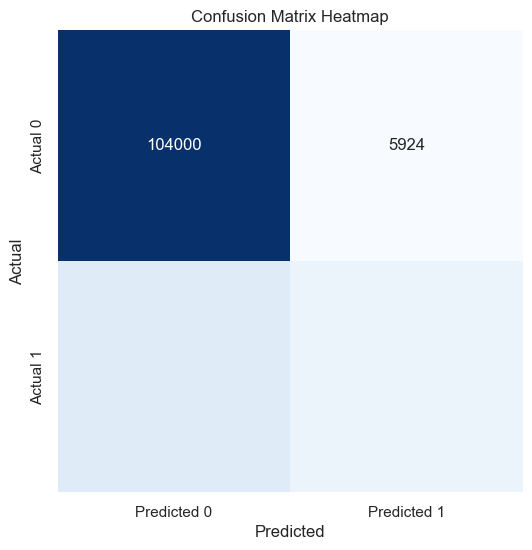

Confusion Matrix:
True Negative: 104000
False Positive: 5924
False Negative: 18150
True Positive: 11427

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.95      0.90    109924
           1       0.66      0.39      0.49     29577

    accuracy                           0.83    139501
   macro avg       0.75      0.67      0.69    139501
weighted avg       0.81      0.83      0.81    139501

Precision(Positive Predictive Value) measures how many of the predicted positive instances are actually positive. A high precision indicates low false positives.
e.g. precision of 0.98 for class 0 means 98% are actually class 0
Recall(Sensitivity or True Positive Rate) measures how many of the actual positive instances were correctly predicted. A high recall indicates low false negatives.
e.g. recall of 0.93 for class 1 means the model correctly identified 93% of the instances of class 1
F1 Score(harmonic mean of precision and recall) prec

In [54]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Calculate confusion matrix
cm = confusion_matrix(y_test, log.predict(X_test))

# Create a heatmap for the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

# Extract confusion matrix values
true_negative = cm[0][0]
false_positive = cm[0][1]
false_negative = cm[1][0]
true_positive = cm[1][1]

# Print confusion matrix values
print('Confusion Matrix:')
print('True Negative:', true_negative)
print('False Positive:', false_positive)
print('False Negative:', false_negative)
print('True Positive:', true_positive)
print()

# Print other classification metrics
report = classification_report(y_test, log.predict(X_test))
print('Classification Report:')
print(report)
print("Precision(Positive Predictive Value) measures how many of the predicted positive instances are actually positive. A high precision indicates low false positives.")
print("e.g. precision of 0.98 for class 0 means 98% are actually class 0")
print("Recall(Sensitivity or True Positive Rate) measures how many of the actual positive instances were correctly predicted. A high recall indicates low false negatives.")
print("e.g. recall of 0.93 for class 1 means the model correctly identified 93% of the instances of class 1")
print("F1 Score(harmonic mean of precision and recall) precision and recall, making it suitable for cases where you want a balance between minimizing false positives and false negatives.")
print("Support e.g. value of 33,044 for class 1 means there are 33,044 instances in the dataset that belong to class 1.")
print("Accuracy is how well the model performed across all classes e.g. accuracy of 0.98 mean the model correctly predicted about 98% of all instances across both classes.")
print("Macro Avg. - average of precision, recall, and F1-score across all classes. Treats all classes equally")
print("Weighted Avg. - similar to the macro average, but it takes into account the class imbalance. It's a weighted average based on the number of instances in each class.")

Evaluating the results of this model:

66% of the loans that the model predicted would be in default is actually in default. 34% are false positives (identified as in default but not actually in default).

Of all instances of loans in default, the model correctly identified 39% of those cases.

Taking into consideration predictions of loans in default and loans not into default, the overall accuracy of the model is 83%.

We note that loans in default vs loans not in default is imbalanced, which would affect the outcome of the model. Let's employ SMOTE to balance the dataset and observe the outcome. 

In [55]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=2)

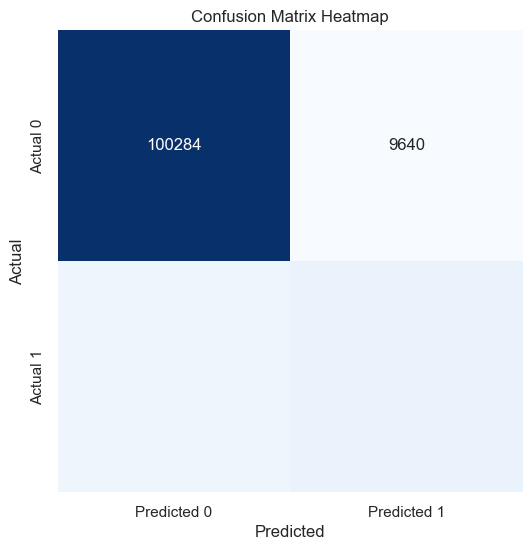

Confusion Matrix:
True Negative: 100284
False Positive: 9640
False Negative: 13627
True Positive: 15950

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.91      0.90    109924
           1       0.62      0.54      0.58     29577

    accuracy                           0.83    139501
   macro avg       0.75      0.73      0.74    139501
weighted avg       0.83      0.83      0.83    139501



In [58]:
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

# Initialize the SMOTE object
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Apply SMOTE to balance the dataset
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


X_train_resampled[col_to_stdz] = ss.fit_transform(X_train_resampled[col_to_stdz])
X_test[col_to_stdz] = ss.transform(X_test[col_to_stdz])

log_bal = LogisticRegression(solver='lbfgs', max_iter=500)
log_bal.fit(X_train_resampled,y_train_resampled)

# Calculate confusion matrix
cm = confusion_matrix(y_test, log_bal.predict(X_test))

# Create a heatmap for the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

# Extract confusion matrix values
true_negative = cm[0][0]
false_positive = cm[0][1]
false_negative = cm[1][0]
true_positive = cm[1][1]

# Print confusion matrix values
print('Confusion Matrix:')
print('True Negative:', true_negative)
print('False Positive:', false_positive)
print('False Negative:', false_negative)
print('True Positive:', true_positive)
print()

# Print other classification metrics
report = classification_report(y_test, log_bal.predict(X_test))
print('Classification Report:')
print(report)

62% of the loans that the model predicted would be in default is actually in default. 38% are false positives (identified as in default but not actually in default).

Of all instances of loans in default, the model correctly identified 54% of those cases. This is an important improvement, but overall still not a good result.

Taking into consideration predictions of loans in default and loans not into default, the overall accuracy of the model is 83%.

Let's try XGBoost.

In [59]:
from xgboost import XGBClassifier
xgboost = XGBClassifier(random_state=2)

xgboost.fit(X_train_resampled, y_train_resampled)
y_xgbpred = xgboost.predict(X_test)

# Print the results
print(classification_report(y_test, y_xgbpred, digits=3))


              precision    recall  f1-score   support

           0      0.969     0.967     0.968    109924
           1      0.879     0.886     0.883     29577

    accuracy                          0.950    139501
   macro avg      0.924     0.927     0.926    139501
weighted avg      0.950     0.950     0.950    139501



Evaluating the results of this model:

88.1% of the loans that the model predicted would be in default is actually in default. 11.9% are false positives (identified as in default but not actually in default).

Of all instances of loans in default, the model correctly identified 89.3% of those cases.

Taking into consideration predictions of loans in default and loans not into default, the overall accuracy of the model is 95.2%.

This is the best performing model, and the model we will move forward with.